<h1 align=center > Insurance Claim Analysis </h1>

In [335]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [336]:
df = pd.read_csv('insurance_data.csv')
df.sample(10)

index  PatientID   age  gender   bmi  bloodpressure diabetic  children  \
319     319        320  26.0    male  42.9             95      Yes         1   
192     192        193  55.0  female  34.5             87      Yes         0   
151     151        152  26.0    male  33.7             99       No         0   
362     362        363  40.0  female  27.5             98      Yes         1   
1214   1214       1215  40.0    male  32.9             87      Yes         2   
601     601        602  44.0    male  30.1             86       No         3   
116     116        117  49.0  female  28.2             98      Yes         0   
584     584        585  29.0    male  30.9             89      Yes         4   
505     505        506  34.0  female  26.2             88      Yes         1   
967     967        968  45.0    male  26.4            103      Yes         0   

     smoker     region     claim  
319      No  southwest   4536.26  
192      No  northwest   3021.81  
151      No  southeast   2498.41  
362      No  southwest   5003.85  
1214    Yes  southwest  36085.22  
601      No  northwest   8410.05  
116      No  southeast   2200.83  
584      No  northwest   8162.72  
505      No  southeast   7046.72  
967      No  northeast  14394.56

# Data Cleaning

In [337]:
df.drop(columns=['index','PatientID'],inplace=True)
df.head()

age gender   bmi  bloodpressure diabetic  children smoker     region  \
0  39.0   male  23.2             91      Yes         0     No  southeast   
1  24.0   male  30.1             87       No         0     No  southeast   
2   NaN   male  33.3             82      Yes         0     No  southeast   
3   NaN   male  33.7             80       No         0     No  northwest   
4   NaN   male  34.1            100       No         0     No  northwest   

     claim  
0  1121.87  
1  1131.51  
2  1135.94  
3  1136.40  
4  1137.01

# Dimension of data

In [338]:
df.shape

(1340, 9)

# How Many Null Values

In [339]:
df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

> **Observation:** **Age** has 5 and **region** has 3 null values 

# What type of data is?

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


In [341]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('darkgrid')

# Why do EDA?

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

### Separate out Categorical and Numerical Features

In [342]:
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns : ", cat_cols)

Categorical columns :  ['gender', 'diabetic', 'smoker', 'region']


In [343]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns : ", num_cols)

Numerical columns :  ['age', 'bmi', 'bloodpressure', 'children', 'claim']


# Seperated Columns

- **Numerical** - age,bmi,bloodpressure,claim
- **Categorical** -gender, diabetic,children,smoker, region

# UniVariant EDA

> # Age 

> - **Missing Values** 3 
> - **Shape** Appears bimodal, with peaks around 30-35 and 40-45.
> - **Outliers** No

In [303]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

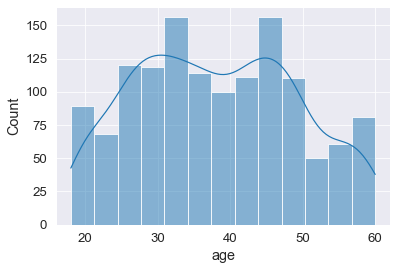

In [304]:
sns.histplot(df['age'],kde=True);

> ##  - Appears Almost binomial, with peaks around 30-35 and 40-45.

<AxesSubplot: xlabel='age', ylabel='Density'>

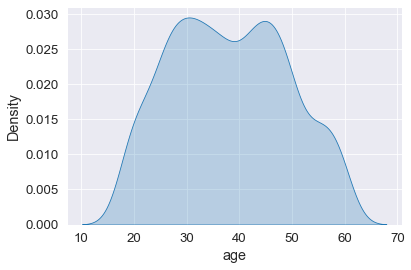

In [305]:
sns.kdeplot(df['age'],fill=True)

In [306]:
df['age'].skew()

0.11361133741072633

In [307]:
df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [308]:
df['age'].isnull().sum()

5

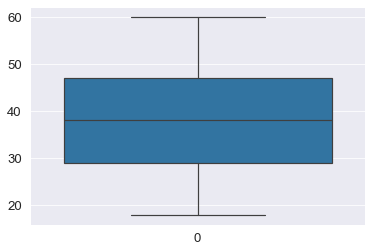

In [309]:
sns.boxplot(df['age']);

> No Outliers

# Catagorical_Data_Frame

In [310]:
cat_df = pd.DataFrame()

# BMI

- **Missing Values**     0 
- **Shape** Noraml Distriubution
- **Outliers** 4 max 

In [311]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<AxesSubplot: xlabel='bmi', ylabel='Count'>

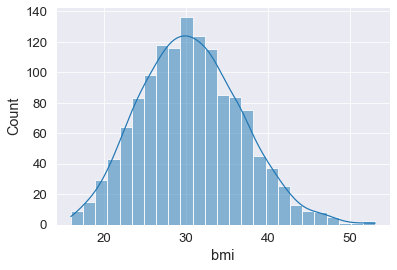

In [312]:
sns.histplot(df['bmi'],kde=True)

<AxesSubplot: xlabel='bmi', ylabel='Density'>

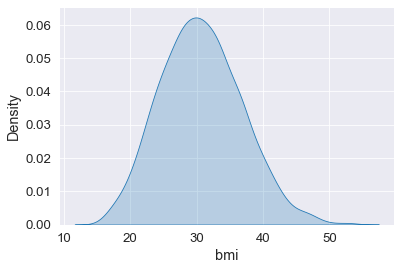

In [313]:
sns.kdeplot(df['bmi'],fill=True)

> ##  **Observation:** Normally Distributed

# Outliers Detection

In [82]:
upper_limit= df['bmi'].mean()+3*df['bmi'].std()
upper_limit

48.9891595244066

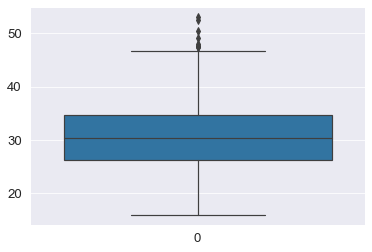

In [83]:
sns.boxplot(df['bmi']);

In [84]:
df[df['bmi']>upper_limit].shape

(4, 9)

> - ## There are 4 outliers in BMI

# Removing Outliers 

In [85]:
df['bmi']= np.where(df['bmi'] >upper_limit,upper_limit,df['bmi'])

In [86]:
df[df['bmi']>upper_limit].shape

(0, 9)

In [87]:
def bmi_categorizer(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Healthy"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    elif bmi >= 30 and bmi < 40:
        return "Obese"
    else:
        return "Very Obese"

cat_df['bmi'] = df['bmi'].apply(bmi_categorizer)

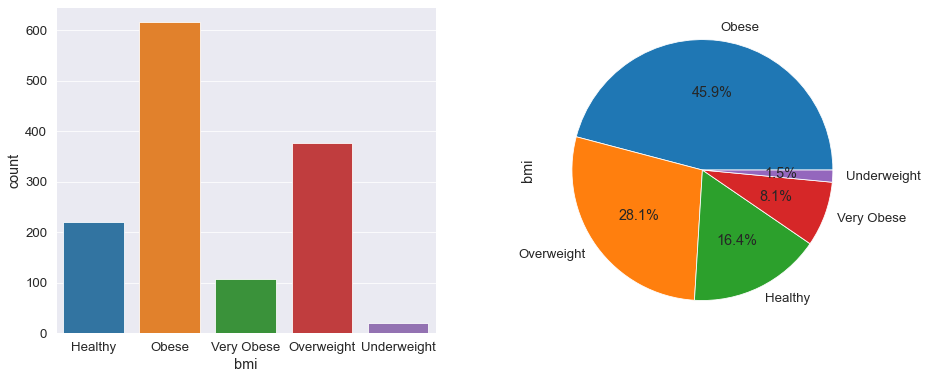

In [88]:
# Increase size of the image i.e lables
fig = plt.figure(figsize=(15,6))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=cat_df['bmi'],ax=ax1)
cat_df['bmi'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);

> # BMI Observations
> - ### Normally distributed with 4 outliers.
> - ### Predominantly obese patients and very few underweight individuals.

# Blood Pressure

- **Missing Values**     0 
- **Shape** Positive Skewed
- **Outliers** 4.6 % Outliers 

In [89]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

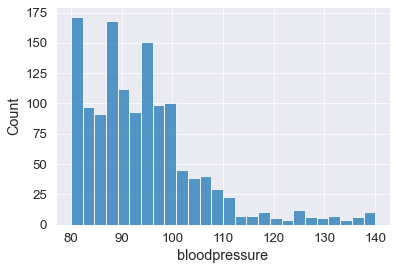

In [90]:
sns.histplot(df['bloodpressure']);

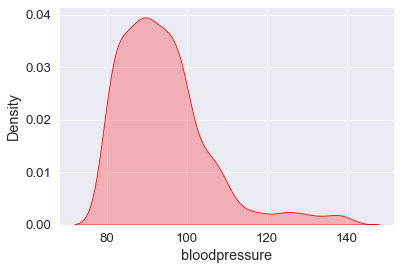

In [92]:
sns.kdeplot(df['bloodpressure'], fill=True, color='red', cbar=True);

In [32]:
df['bloodpressure'].skew()

1.4835342102293079

In [33]:
def bp_categorizer(bp):
    if 80<=bp < 89:
        return "elevated"
    elif 90<= bp <= 99:
        return "High"
    elif  99< bp <100:
        return "very high"
    elif 100<=bp<120:
        return "extremely high"
    else:
        return "fatal"

cat_df['bloodpressure'] = df['bloodpressure'].apply(bp_categorizer)

<AxesSubplot: ylabel='bloodpressure'>

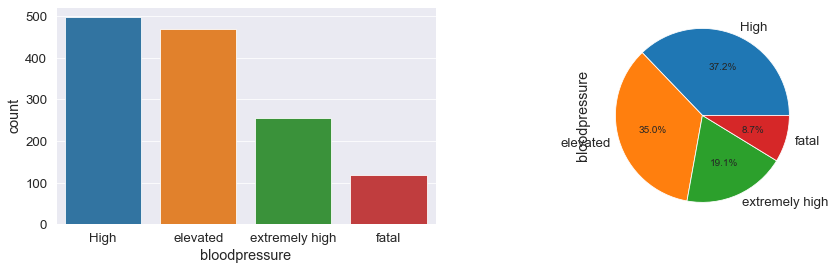

In [34]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=cat_df['bloodpressure'],ax=ax1)
cat_df['bloodpressure'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2)


> # Blood Pressure Distribution

> - ### Highly positively skewed.
> - ### Approximately 35% of patients exhibit elevated BP, while 4.3% are in a critical state (fatal).


# Outliers Detection

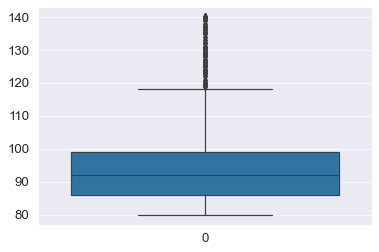

In [35]:
sns.boxplot(df['bloodpressure']);

In [36]:
df.shape

(1340, 9)

# Removing Outliers 

In [37]:
iqr = df['bloodpressure'].quantile(0.75) - df['bloodpressure'].quantile(0.25)
upper_limit= df['bloodpressure'].quantile(0.75) + iqr *1.5
df[df['bloodpressure']>upper_limit].shape

(62, 9)

In [38]:
df[df['bloodpressure']>upper_limit].shape[0]/df.shape[0]*100

4.626865671641791

- There are 62 Outliers in BloodPressure Column Which Is 4% of the data 

In [39]:
df['bloodpressure']= np.where(df['bloodpressure'] >upper_limit,upper_limit,df['bloodpressure'])
#df = df[df['bloodpressure']<=upper_limit]

# After Removal of Outliers

In [40]:
df[df['bloodpressure']>upper_limit].shape[0]/df.shape[0]*100

0.0

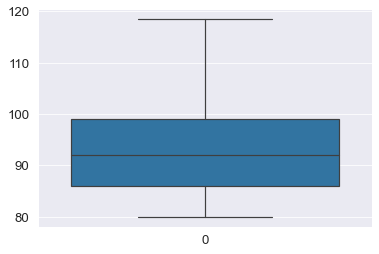

In [41]:
sns.boxplot(df['bloodpressure']);

# claim

- **Missing Values**     0 
- **Shape** Positive Skewed
- **Outliers** 4.6 % Outliers 

In [42]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

In [43]:
df['claim'].skew()

1.5167468509489237

<AxesSubplot: xlabel='claim', ylabel='Count'>

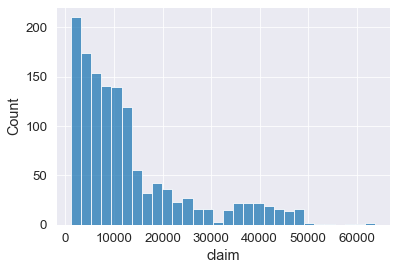

In [120]:
sns.histplot(df['claim'])

<AxesSubplot: xlabel='claim', ylabel='Density'>

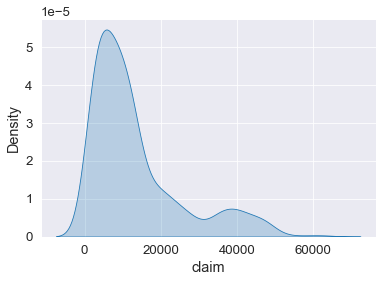

In [121]:
sns.kdeplot(df['claim'],fill=True)

<AxesSubplot: >

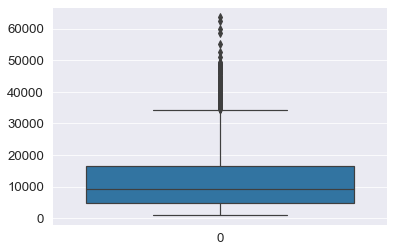

In [283]:
sns.boxplot(df['claim'])

> # Claim

> - ### Outliers are 10% of the data.
> - ### highly positively skewed nature.

# Removing Outliers 

In [123]:
iqr = df['claim'].quantile(0.75) - df['claim'].quantile(0.25)
upper_limit= df['claim'].quantile(0.75) + iqr *1.5
df[df['claim']>upper_limit].shape[0]

141

In [124]:
(df[df['claim']>upper_limit].shape[0]/df.shape[0])*100

10.522388059701493

- There are 139 Outliers in Claim  Which Is 10% of the data 

In [125]:
df['claim']= np.where(df['claim'] >upper_limit,upper_limit,df['claim'])

In [126]:
df.dropna(inplace=True)

# Bivariant EDA

# Catagorical Columns
- Gender
- diabetic
- Region
- smoker

In [127]:
sns.set_context('paper', font_scale = 1.7)

<AxesSubplot: ylabel='gender'>

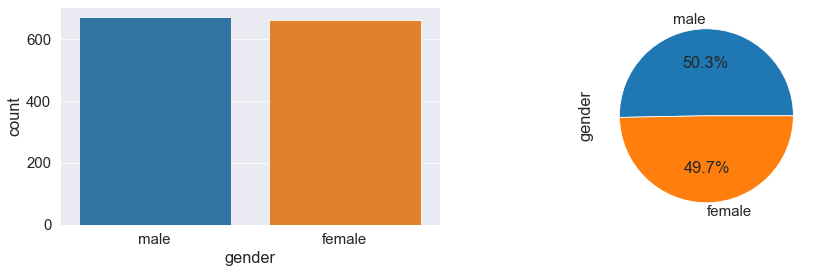

In [128]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['gender'],ax=ax1)
df['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2)

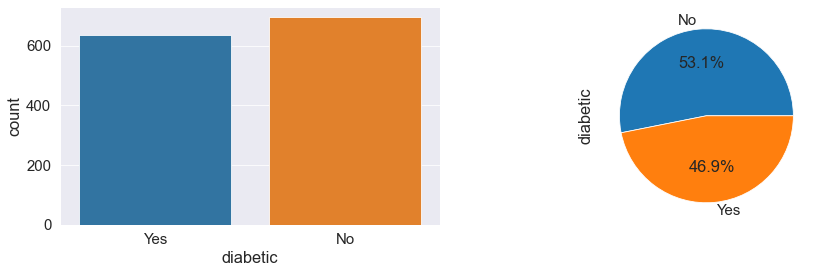

In [129]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['diabetic'],ax=ax1)
df[df['gender']=='male']['diabetic'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);

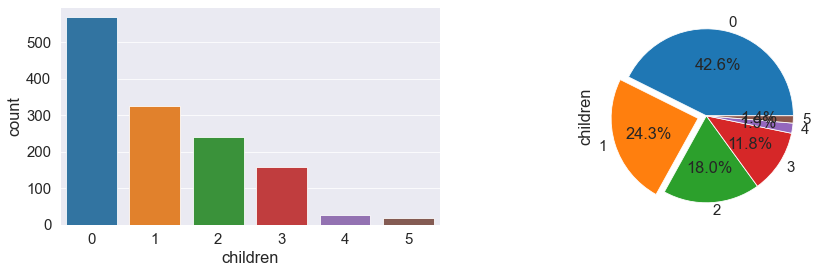

In [130]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['children'],ax=ax1)
df['children'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0,0.1,0,0,0,0]);

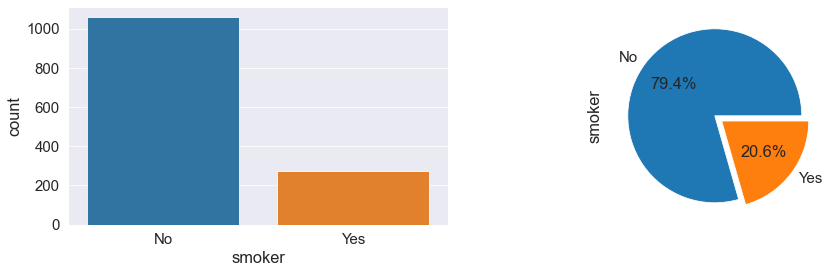

In [131]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['smoker'],ax=ax1)
df['smoker'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0,0.1]);

In [132]:
df = df[~df['region'].isnull()]

<AxesSubplot: ylabel='region'>

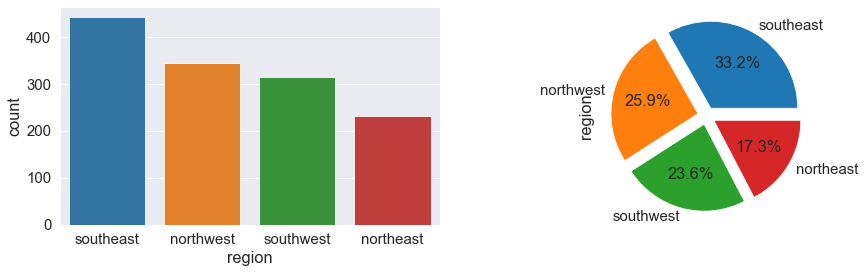

In [133]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['region'],ax=ax1)
df['region'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0.1]*4)


In [134]:
df.head(1)

age gender   bmi  bloodpressure diabetic  children smoker     region  \
0  39.0   male  23.2           91.0      Yes         0     No  southeast   

     claim  
0  1121.87

# Cat to Cat
- gender with diabetic
- gender with children
- gender with smoker
- gender with region
- bmi_cat with bloodpressure
- bloodpressure_cat with  claim



In [135]:
pd.crosstab(df['gender'],df['diabetic'])

diabetic   No  Yes
gender            
female    339  323
male      356  314

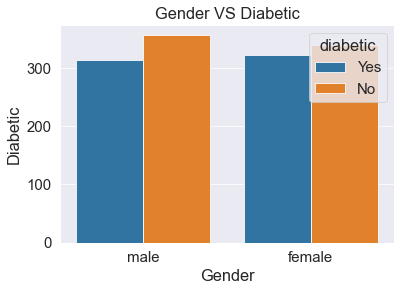

In [136]:
sns.countplot(x=df['gender'],hue=df['diabetic'])
plt.xlabel('Gender')
plt.ylabel('Diabetic')
plt.title('Gender VS Diabetic')
plt.show();

In [141]:
pd.crosstab(df['gender'],df['smoker'])

smoker   No  Yes
gender          
female  547  115
male    516  159

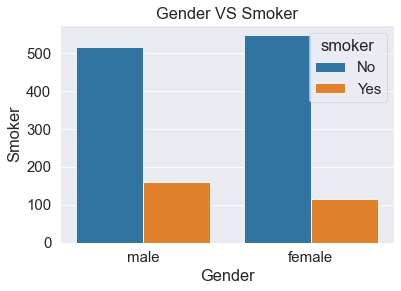

In [142]:
sns.countplot(x=df['gender'],hue=df['smoker'])
plt.xlabel('Gender')
plt.ylabel('Smoker')
plt.title('Gender VS Smoker')
plt.show();


In [143]:
pd.crosstab(df['gender'],df['region'])

region  northeast  northwest  southeast  southwest
gender                                            
female        112        164        224        162
male          119        185        219        152

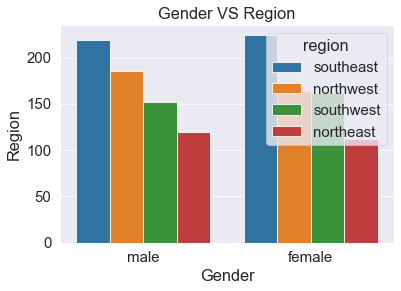

In [144]:
sns.countplot(x=df['gender'],hue=df['region'])
plt.xlabel('Gender')
plt.ylabel('Region')
plt.title('Gender VS Region')
plt.show();

In [145]:
pd.crosstab(df['gender'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
gender                                              
female          249       235             129     49
male            249       232             126     68

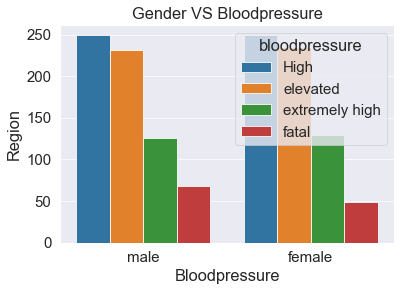

In [146]:
sns.countplot(x=df['gender'],hue=cat_df['bloodpressure'])
plt.xlabel('Bloodpressure')
plt.ylabel('Region')
plt.title('Gender VS Bloodpressure')
plt.show();

In [147]:
pd.crosstab(df['gender'],cat_df['bmi'])

bmi     Healthy  Obese  Overweight  Underweight  Very Obese
gender                                                     
female      114    293         191           12          52
male        106    321         184            8          56

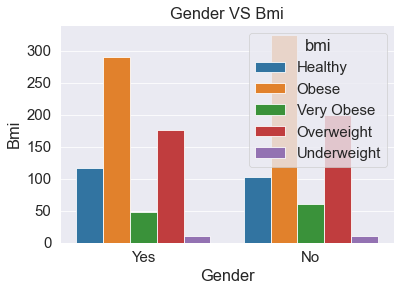

In [148]:
sns.countplot(x=df['diabetic'],hue=cat_df['bmi'])
plt.xlabel('Gender')
plt.ylabel('Bmi')
plt.title('Gender VS Bmi')
plt.show()

In [149]:
pd.crosstab(df['diabetic'],df['smoker'])

smoker     No  Yes
diabetic          
No        559  138
Yes       504  136

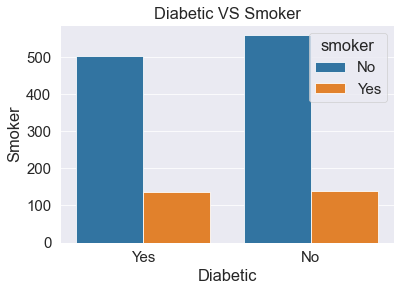

In [150]:

sns.countplot(x=df['diabetic'],hue=df['smoker'])
plt.xlabel('Diabetic')
plt.ylabel('Smoker')
plt.title('Diabetic VS Smoker')
plt.show()

In [151]:
pd.crosstab(df['diabetic'],df['children'])

children    0    1    2   3   4   5
diabetic                           
No        291  179  120  83  13  11
Yes       282  145  120  74  12   7

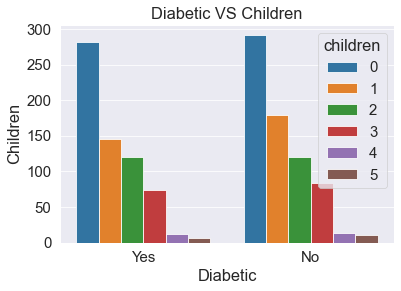

In [152]:
sns.countplot(x=df['diabetic'],hue=df['children'])
plt.xlabel('Diabetic')
plt.ylabel('Children')
plt.title('Diabetic VS Children')
plt.show()

In [153]:
pd.crosstab(df['diabetic'],df['region'])

region    northeast  northwest  southeast  southwest
diabetic                                            
No              110        192        225        170
Yes             121        157        218        144

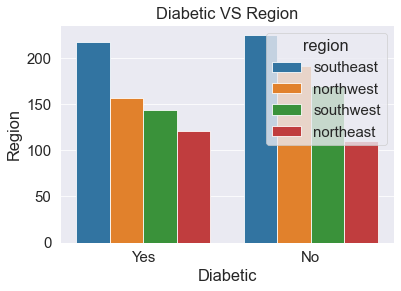

In [154]:
sns.countplot(x=df['diabetic'],hue=df['region'])
plt.xlabel('Diabetic')
plt.ylabel('Region')
plt.title('Diabetic VS Region')
plt.show()

In [155]:
pd.crosstab(df['diabetic'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
diabetic                                            
No              282       231             124     60
Yes             216       236             131     57

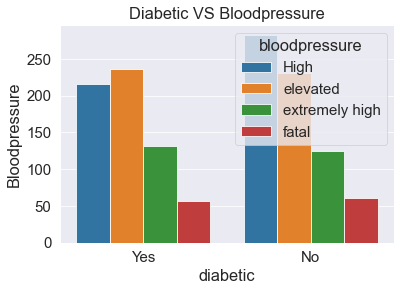

In [156]:
sns.countplot(x=df['diabetic'],hue=cat_df['bloodpressure'])
plt.xlabel('diabetic')
plt.ylabel('Bloodpressure')
plt.title('Diabetic VS Bloodpressure')
plt.show()

In [157]:
pd.crosstab(df['diabetic'],cat_df['bmi'])

bmi       Healthy  Obese  Overweight  Underweight  Very Obese
diabetic                                                     
No            103    324         199           10          61
Yes           117    290         176           10          47

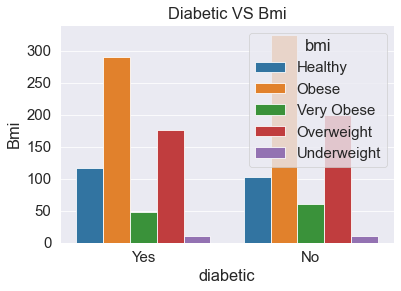

In [158]:
sns.countplot(x=df['diabetic'],hue=cat_df['bmi'])
plt.xlabel('diabetic')
plt.ylabel('Bmi')
plt.title('Diabetic VS Bmi')
plt.show()

In [159]:
pd.crosstab(df['smoker'],df['children'])

children    0    1    2    3   4   5
smoker                              
No        458  263  185  118  22  17
Yes       115   61   55   39   3   1

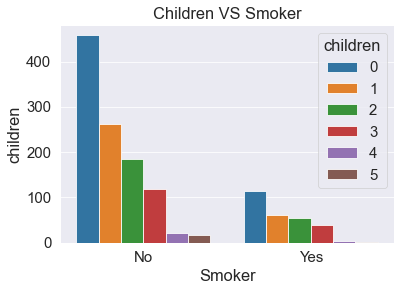

In [160]:
sns.countplot(x=df['smoker'],hue=df['children'])
plt.xlabel('Smoker')
plt.ylabel('children')
plt.title('Children VS Smoker')
plt.show();

In [161]:
pd.crosstab(df['region'],df['smoker'])

smoker      No  Yes
region             
northeast  164   67
northwest  291   58
southeast  352   91
southwest  256   58

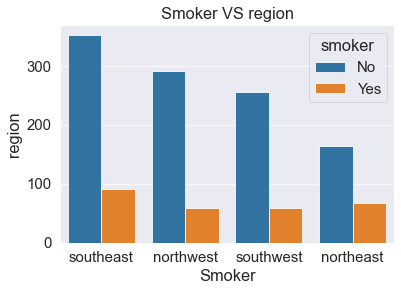

In [162]:
sns.countplot(hue=df['smoker'],x=df['region'])
plt.xlabel('Smoker')
plt.ylabel('region')
plt.title('Smoker VS region')
plt.show()

In [163]:
pd.crosstab(df['smoker'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
smoker                                              
No              437       409             158     59
Yes              61        58              97     58

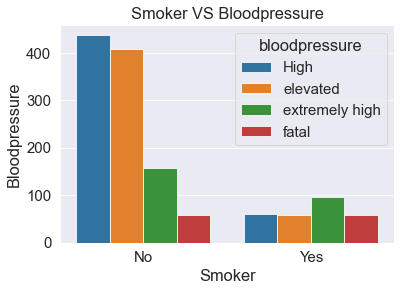

In [164]:
sns.countplot(x=df['smoker'],hue=cat_df['bloodpressure'])
plt.xlabel('Smoker')
plt.ylabel('Bloodpressure')
plt.title('Smoker VS Bloodpressure')
plt.show()

In [165]:
pd.crosstab(df['smoker'],cat_df['bmi'])

bmi     Healthy  Obese  Overweight  Underweight  Very Obese
smoker                                                     
No          171    490         303           15          84
Yes          49    124          72            5          24

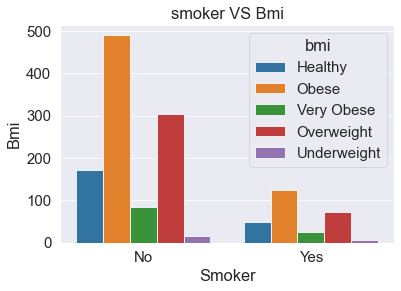

In [166]:
sns.countplot(x=df['smoker'],hue=cat_df['bmi'])
plt.xlabel('Smoker')
plt.ylabel('Bmi')
plt.title('smoker VS Bmi')
plt.show()

# Catagorical and Numerical Columns

- gender with bmi
- gender with bloodpressure
- gender with claim
- diabetic with bmi
- diabetic with bloodpressure
- diabetic with claim
- smoker with bmi
- smoker with bloodpressure
- smoker with claim
- region with bmi
- region with bloodpressure
- region with claim
- cat_bmi with claim
- cat_bloodpressure with claim

In [167]:
sns.set_context('paper', font_scale = 2)

<AxesSubplot: xlabel='gender', ylabel='bmi'>

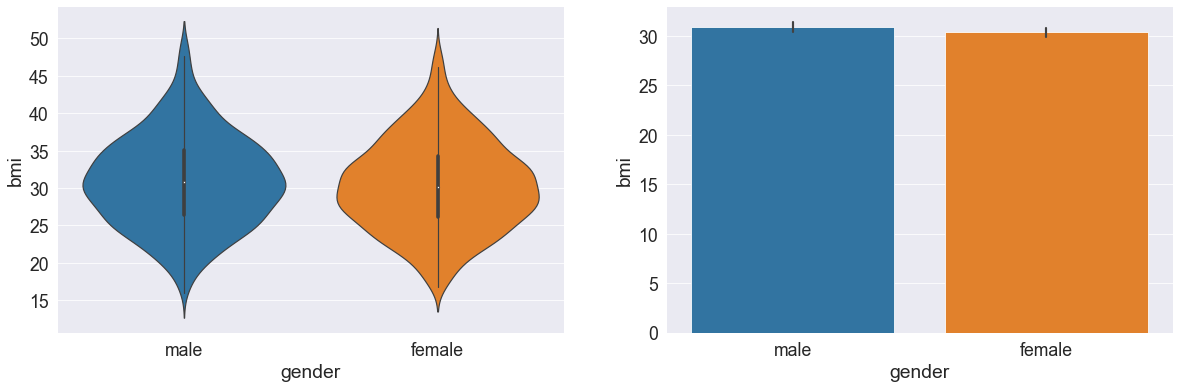

In [168]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],ax=ax2)

<AxesSubplot: xlabel='gender', ylabel='bloodpressure'>

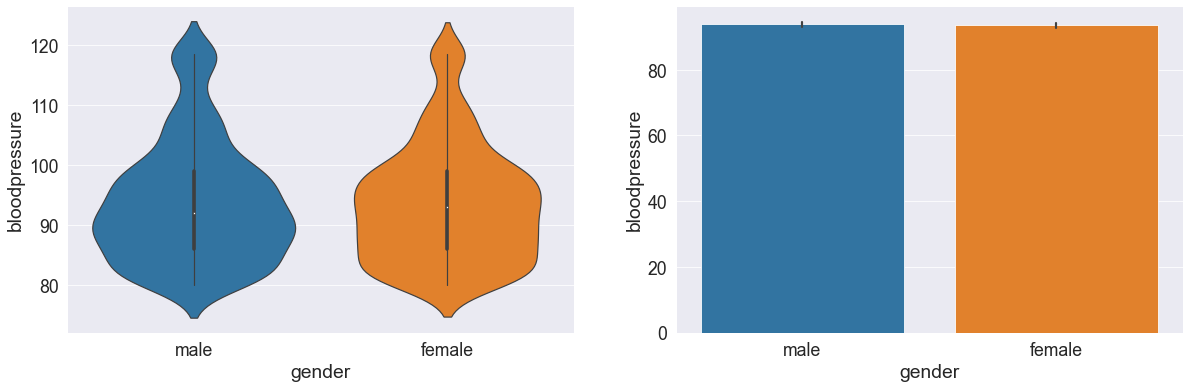

In [169]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],ax=ax2)

<AxesSubplot: xlabel='gender', ylabel='claim'>

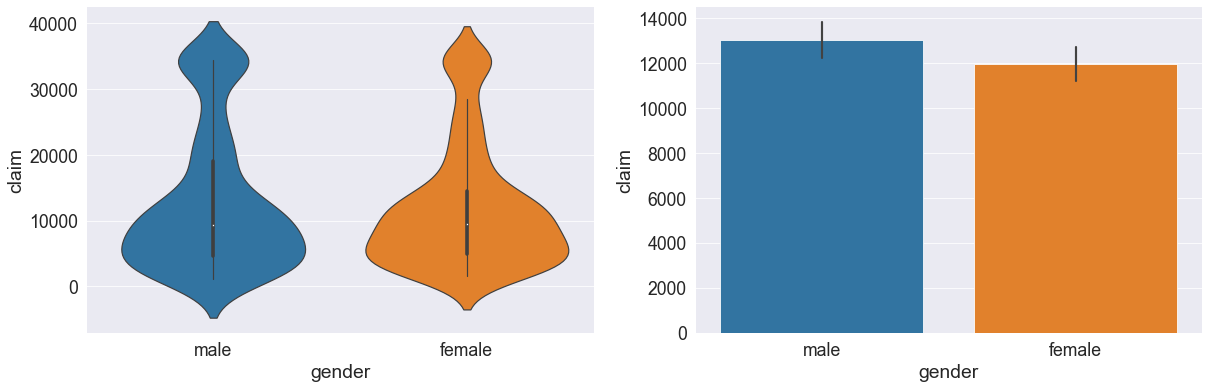

In [170]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],ax=ax2)

<AxesSubplot: xlabel='diabetic', ylabel='bmi'>

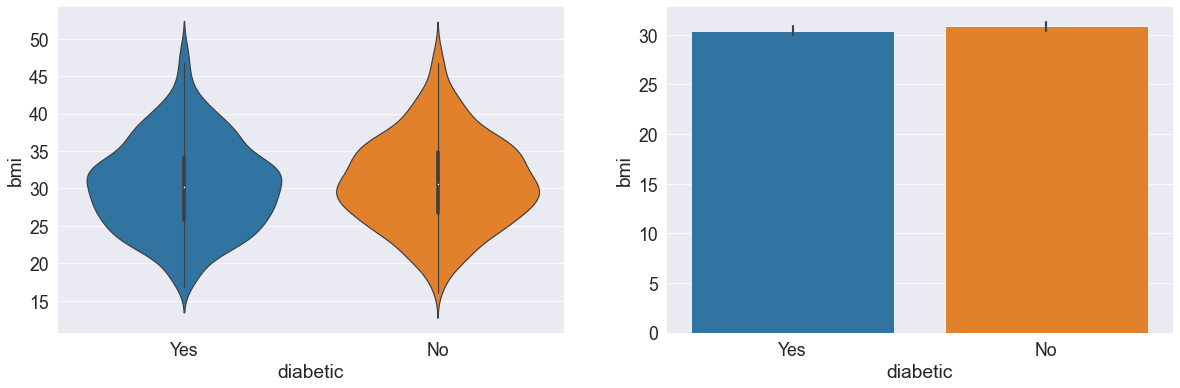

In [171]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],ax=ax2)

<AxesSubplot: xlabel='diabetic', ylabel='bloodpressure'>

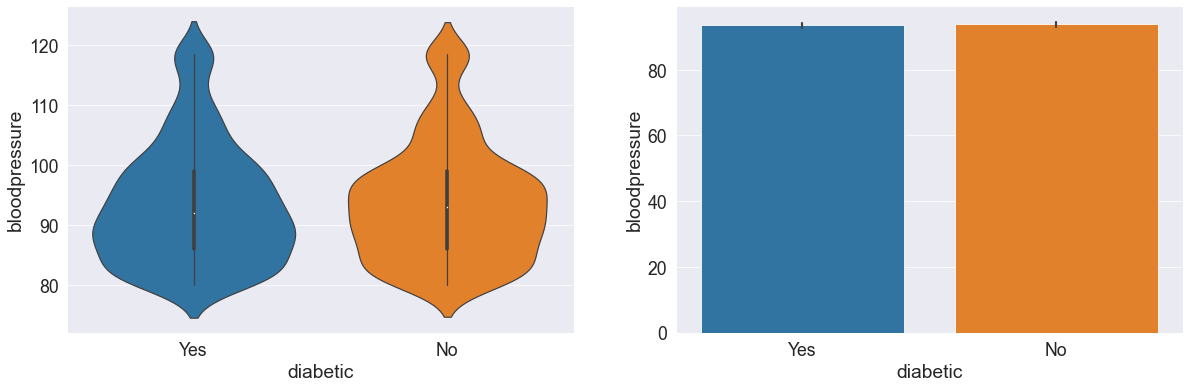

In [172]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bloodpressure'],ax=ax2)

<AxesSubplot: xlabel='diabetic', ylabel='claim'>

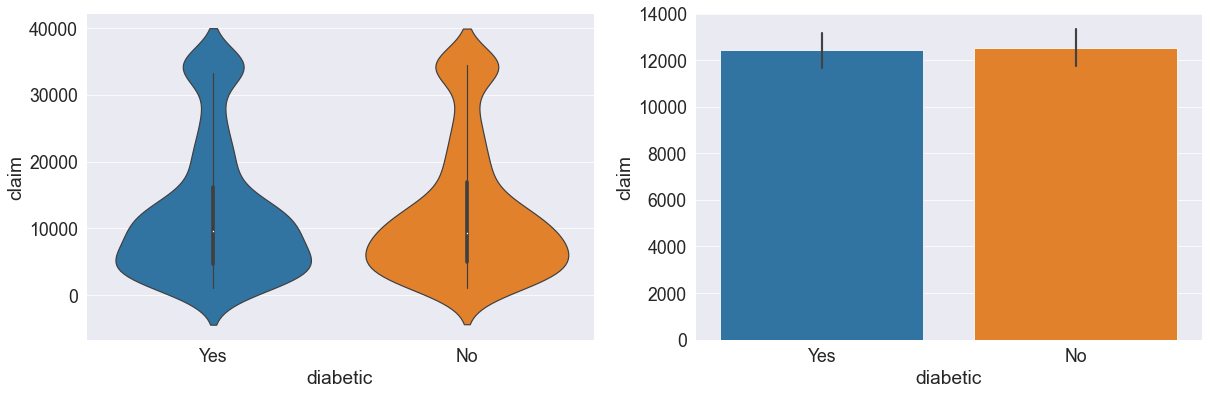

In [173]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],ax=ax2)

<AxesSubplot: xlabel='smoker', ylabel='bmi'>

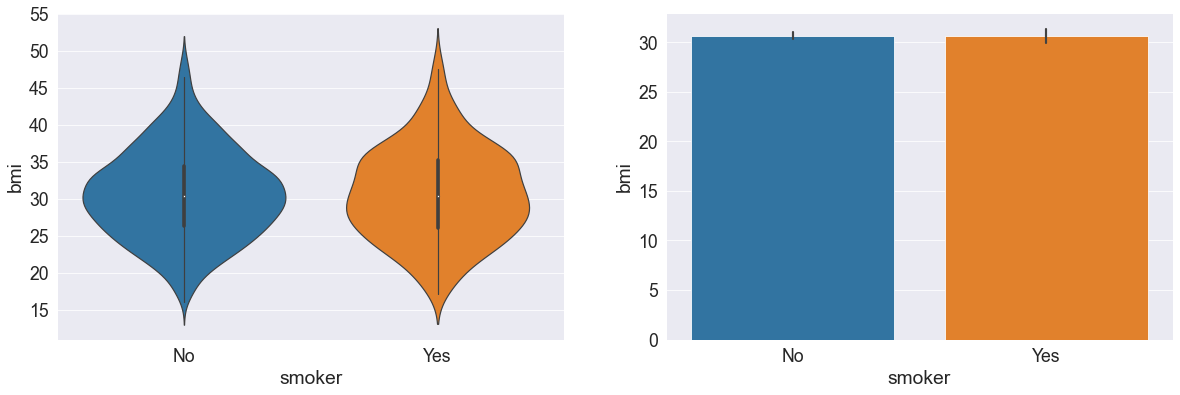

In [174]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['smoker'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['smoker'],y=df['bmi'],ax=ax2)

<AxesSubplot: xlabel='smoker', ylabel='bloodpressure'>

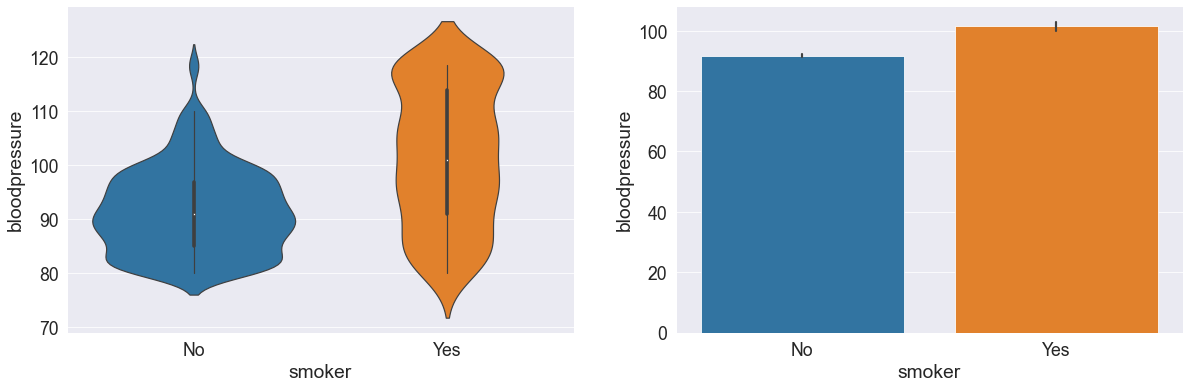

In [175]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['smoker'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['smoker'],y=df['bloodpressure'],ax=ax2)

<AxesSubplot: xlabel='smoker', ylabel='claim'>

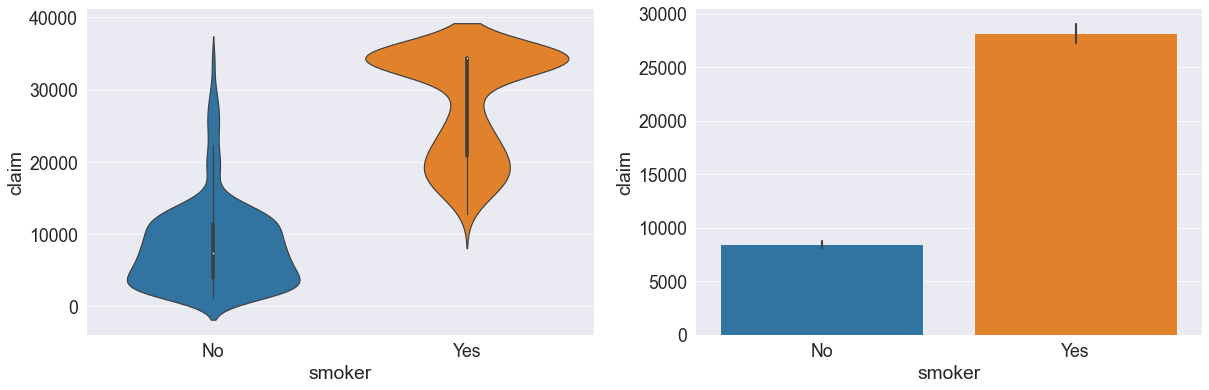

In [176]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['smoker'],y=df['claim'],ax=ax1)
sns.barplot(x=df['smoker'],y=df['claim'],ax=ax2)

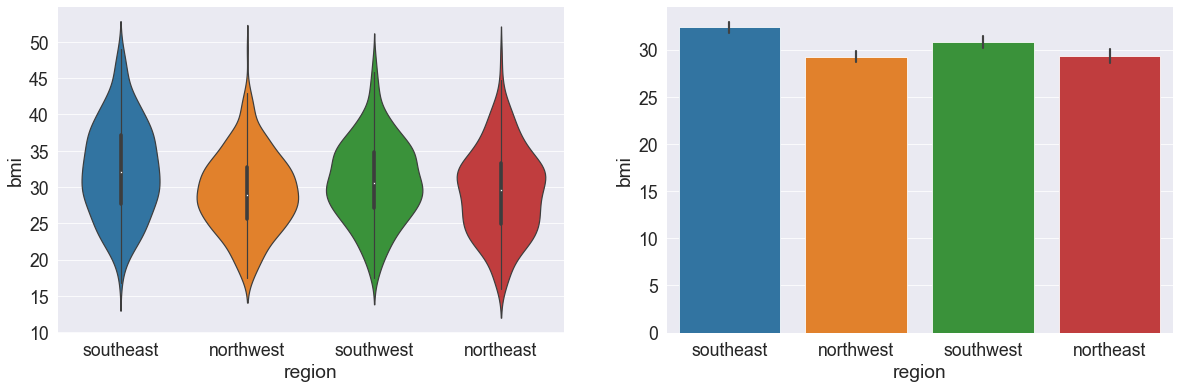

In [177]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['region'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['region'],y=df['bmi'],ax=ax2);

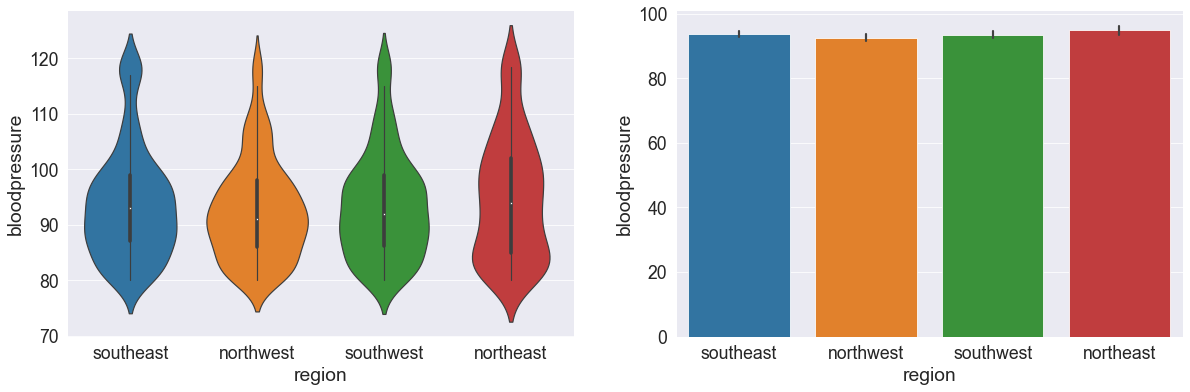

In [178]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['region'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['region'],y=df['bloodpressure'],ax=ax2);

<AxesSubplot: xlabel='region', ylabel='claim'>

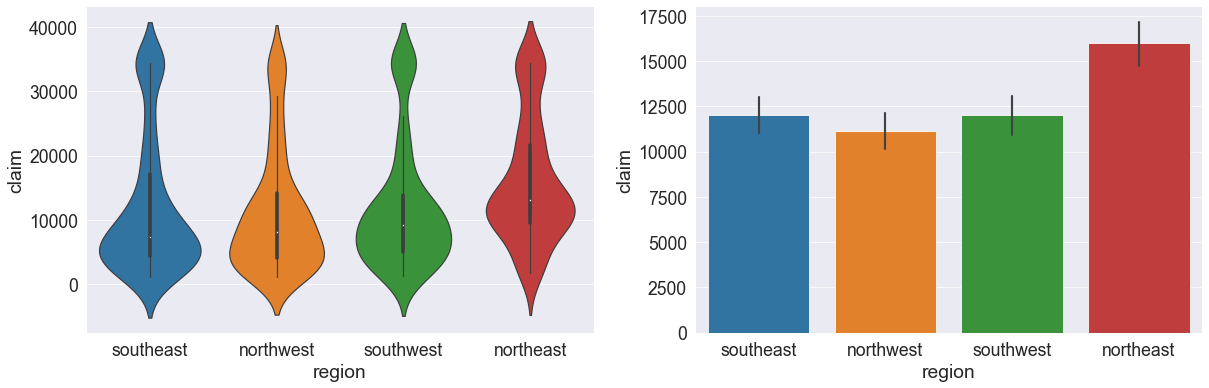

In [179]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['region'],y=df['claim'],ax=ax1)
sns.barplot(x=df['region'],y=df['claim'],ax=ax2)

Text(0.5, 1.0, 'Bmi VS Claim')

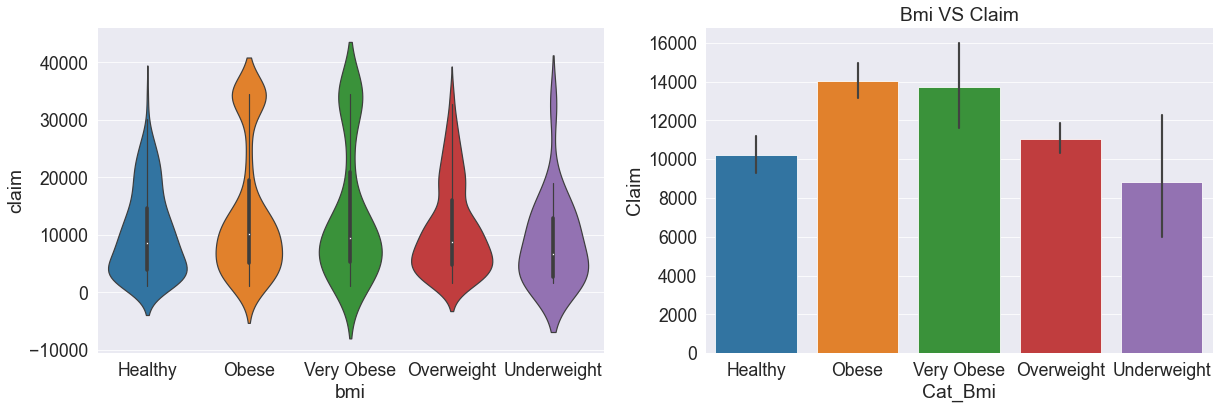

In [180]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],ax=ax2)
plt.xlabel('Cat_Bmi')
plt.ylabel('Claim')
plt.title('Bmi VS Claim')

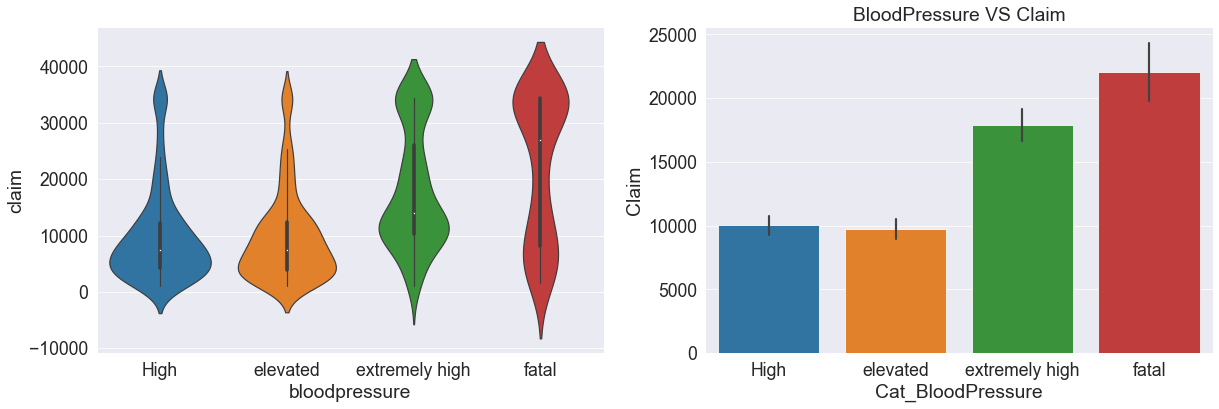

In [181]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],ax=ax2)
plt.xlabel('Cat_BloodPressure')
plt.ylabel('Claim')
plt.title('BloodPressure VS Claim');

# Num to Num
- Age with bmi
- Age with bloodpressure
- Age with claim
- bmi with claim
- bmi with bloodpressure
- bloodpressure with  claim



## Age Vs BloodPressure  Age Vs BMI 

In [182]:
df[num_cols].corr()

age       bmi  bloodpressure  children     claim
age            1.000000 -0.042511      -0.071309 -0.026165 -0.030582
bmi           -0.042511  1.000000       0.141093  0.012078  0.158803
bloodpressure -0.071309  0.141093       1.000000 -0.030587  0.507629
children      -0.026165  0.012078      -0.030587  1.000000  0.072409
claim         -0.030582  0.158803       0.507629  0.072409  1.000000

<AxesSubplot: >

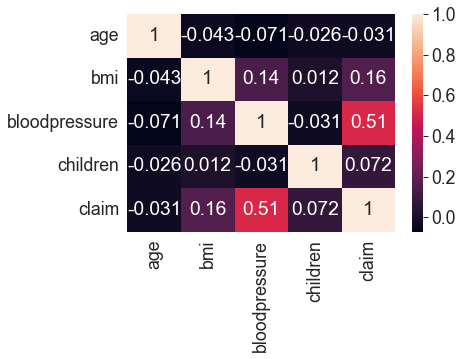

In [183]:
sns.heatmap(df[num_cols].corr(), annot=True)

<AxesSubplot: >

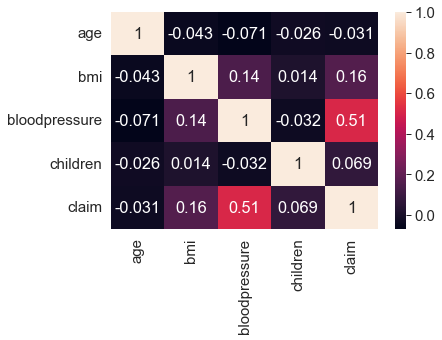

In [137]:
sns.heatmap(df[num_cols].corr(),annot=True)

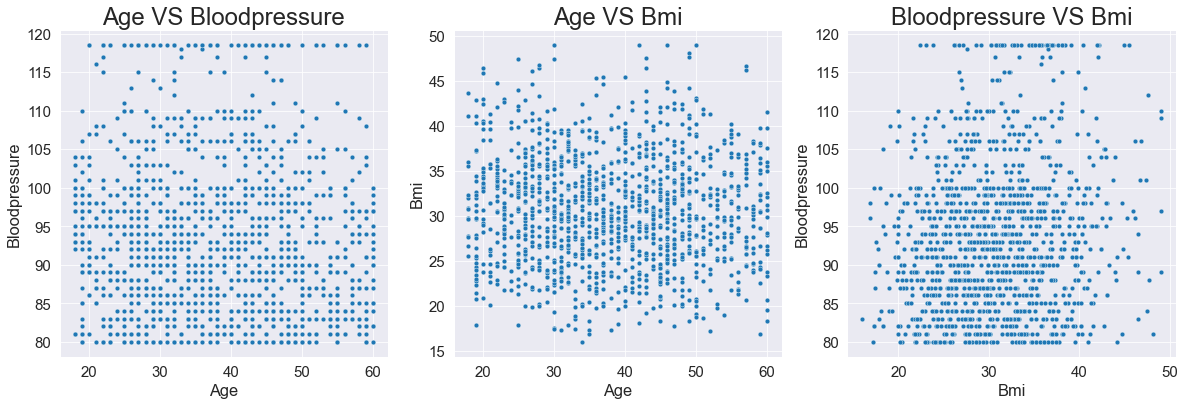

In [144]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['age'],y=df['bloodpressure'],ax=ax1);
ax1.set_xlabel('Age')
ax1.set_ylabel('Bloodpressure')
ax1.set_title('Age VS Bloodpressure', fontsize=24, loc='center')

sns.scatterplot(x=df['age'],y=df['bmi'],ax=ax2);
ax2.set_xlabel('Age')
ax2.set_ylabel('Bmi')
ax2.set_title('Age VS Bmi', fontsize=24, loc='center')

sns.scatterplot(x=df['bmi'],y=df['bloodpressure']);
ax3.set_xlabel('Bmi')
ax3.set_ylabel('Bloodpressure')
ax3.set_title('Bloodpressure VS Bmi', fontsize=24, loc='center');

> <h1>Assumption 1 of Linear Regression:</h1> <h3>There is No Correlation between Input Features</h3>

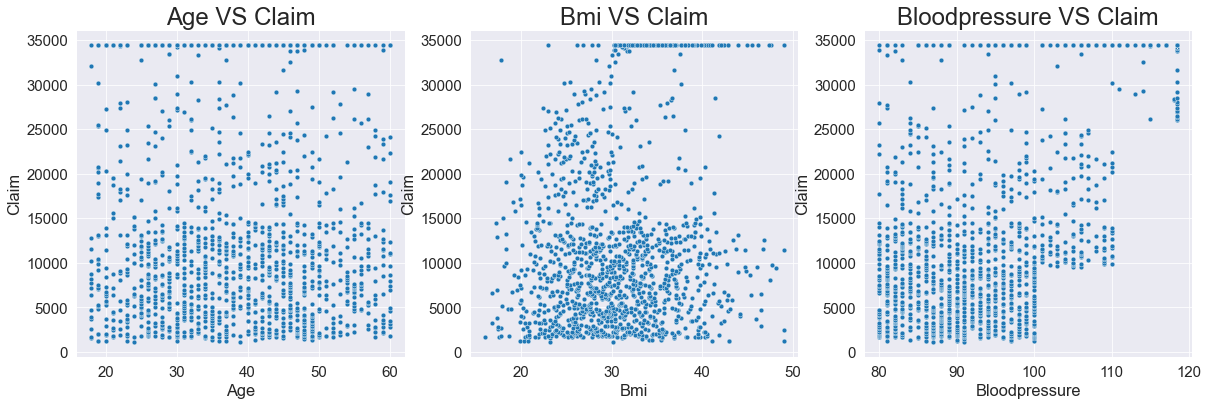

In [147]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['age'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Claim')
ax1.set_title('Age VS Claim', fontsize=24, loc='center');

sns.scatterplot(x=df['bmi'],y=df['claim'],ax=ax2);
ax2.set_xlabel('Bmi')
ax2.set_ylabel('Claim')
ax2.set_title('Bmi VS Claim', fontsize=24, loc='center');

sns.scatterplot(x=df['bloodpressure'],y=df['claim'],ax=ax3);
ax3.set_xlabel('Bloodpressure')
ax3.set_ylabel('Claim')
ax3.set_title('Bloodpressure VS Claim', fontsize=24, loc='center');

# Multivariate Data Anaysis

# Cat to Cat
- gender with diabetic with smoker
- gender with children with smoker
- gender with region with smoker
- bmi_cat with diabetic with smoker
- bmi_cat with children with smoker
- bmi_cat with region with smoker
- blood_ptressure_cat with diabetic with smoker
- blood_ptressure_cat with children with smoker
- blood_ptressure_cat with region with smoker




Text(0.5, 1.0, 'Gender VS BMI VS Children')

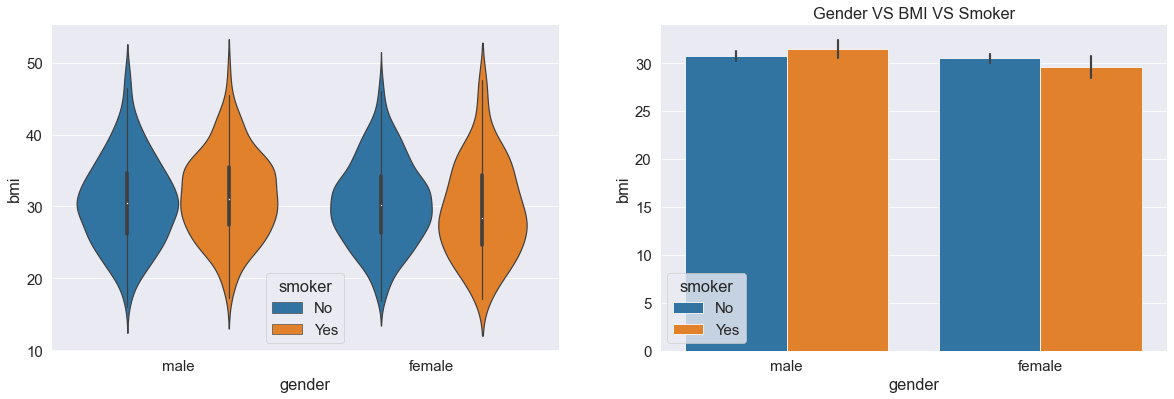

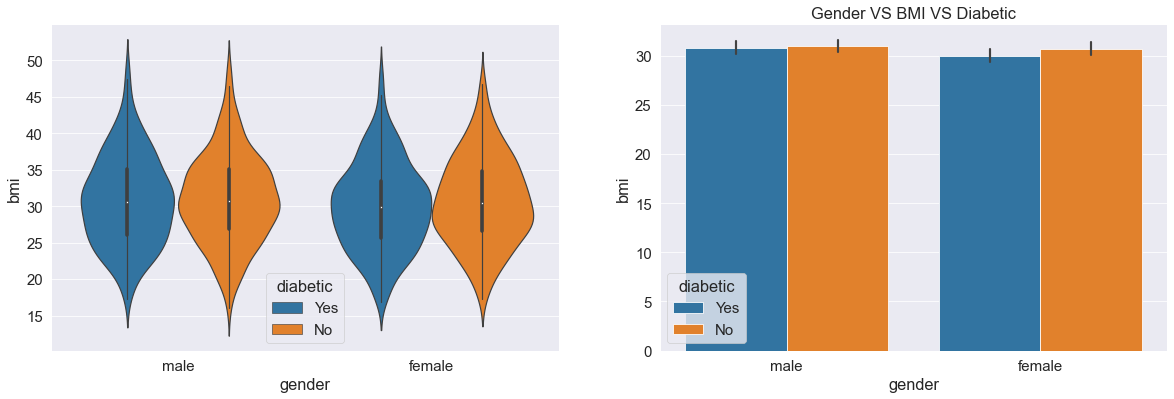

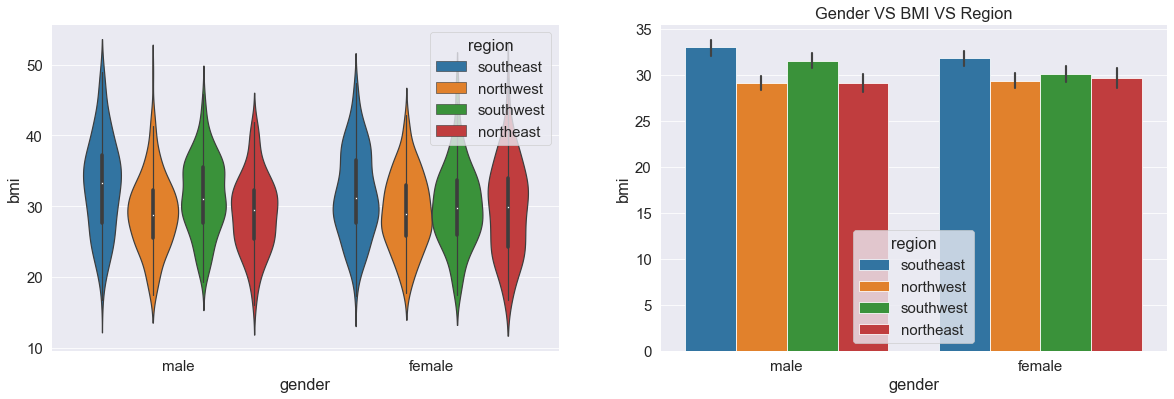

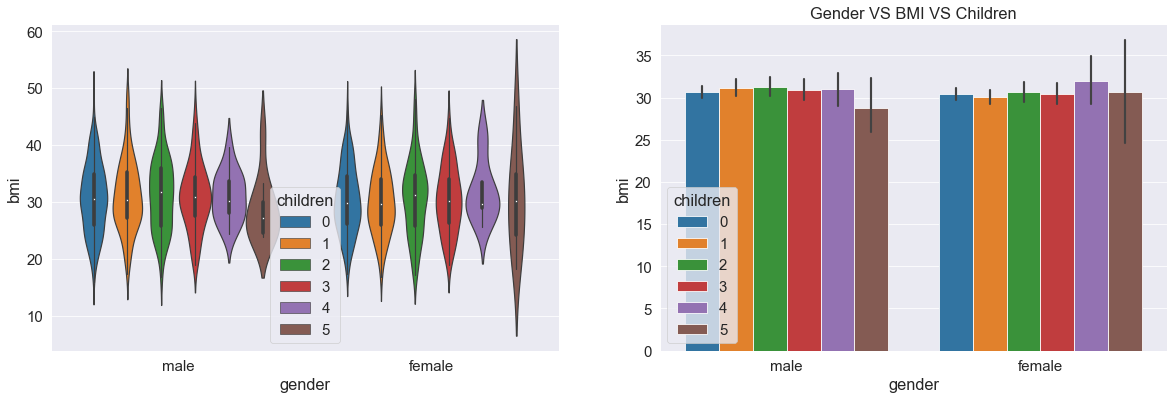

In [148]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS BMI VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS BMI VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax2)
plt.title('Gender VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['children'],ax=ax2)
plt.title('Gender VS BMI VS Children')

Text(0.5, 1.0, 'Gender VS Bloodpressure VS Children')

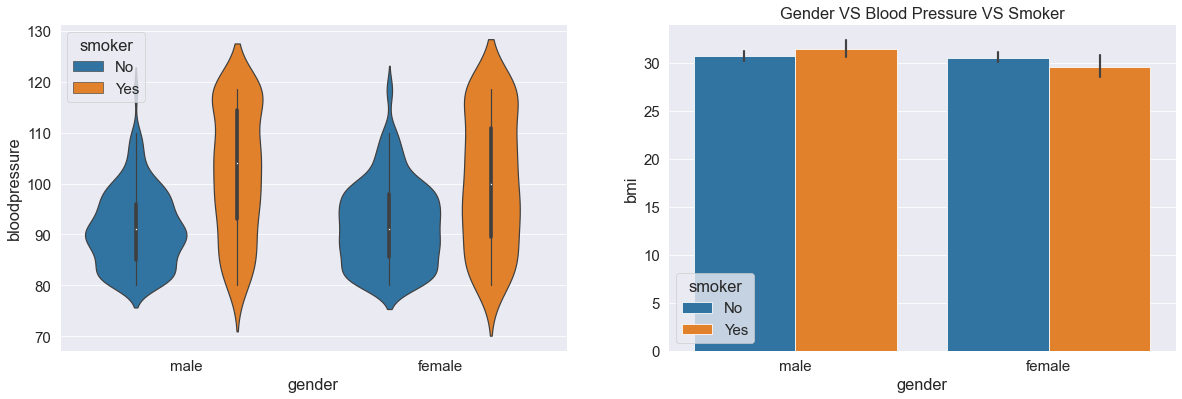

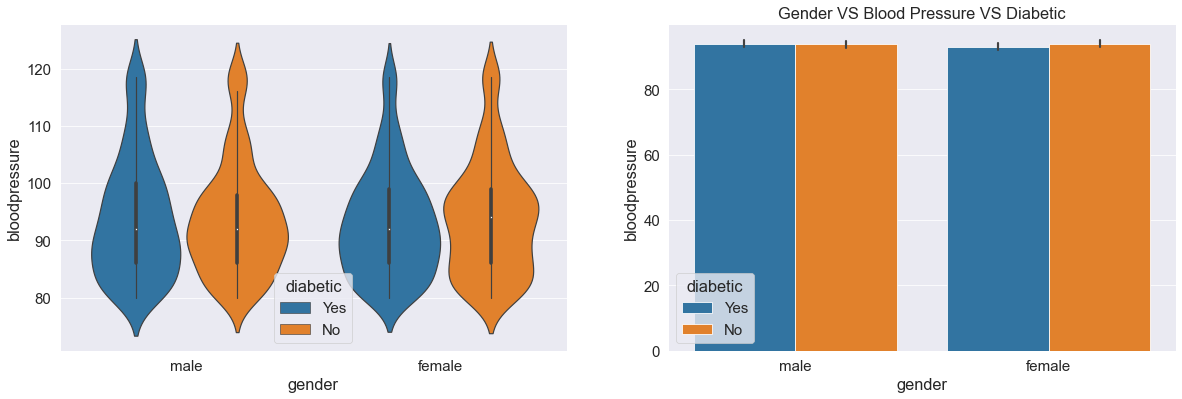

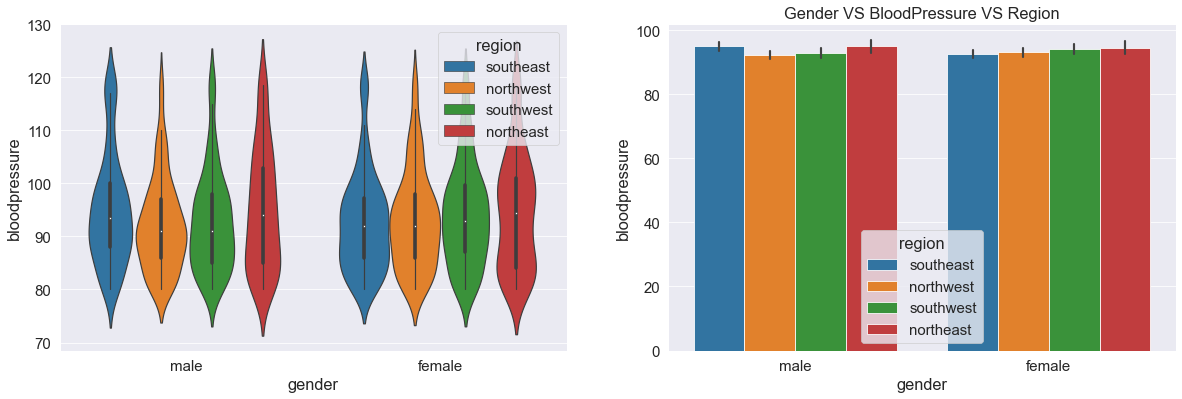

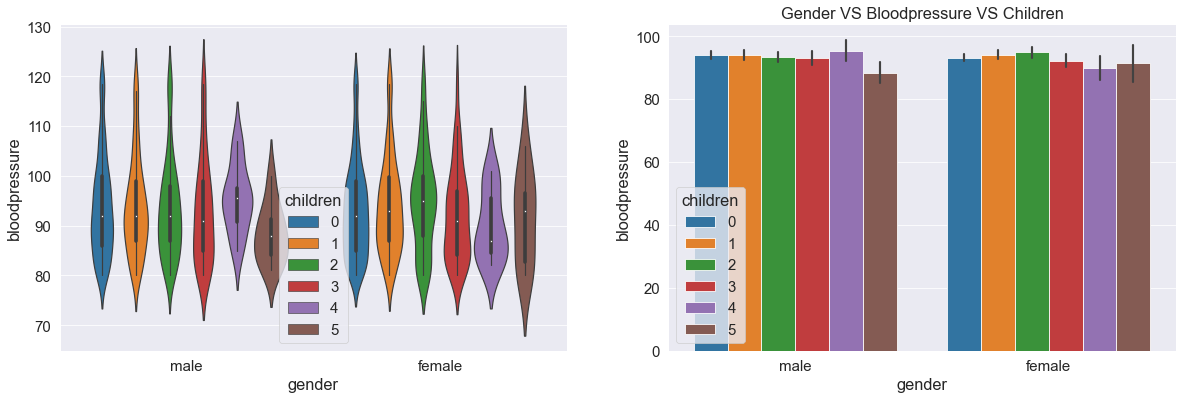

In [149]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS Blood Pressure VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS Blood Pressure VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax2)
plt.title('Gender VS BloodPressure VS Region')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['children'],ax=ax2)
plt.title('Gender VS Bloodpressure VS Children')

Text(0.5, 1.0, 'Gender VS Claim VS Children')

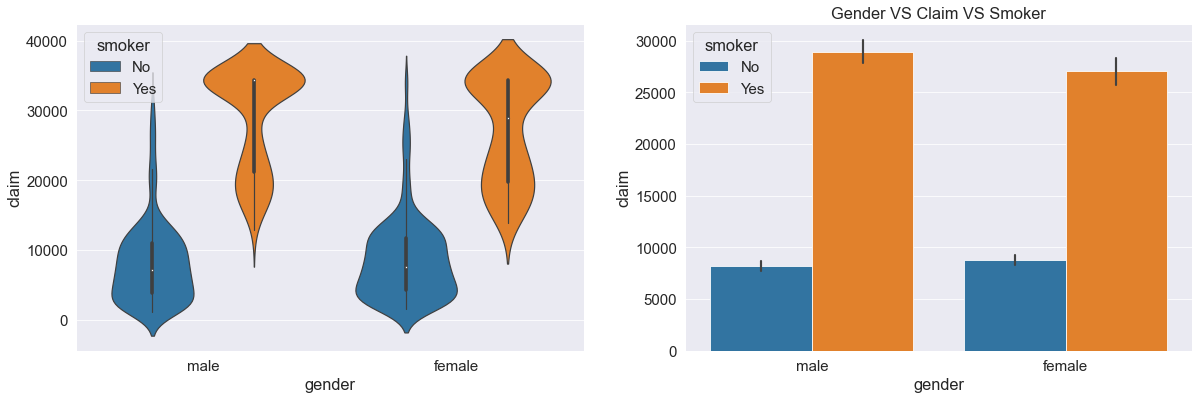

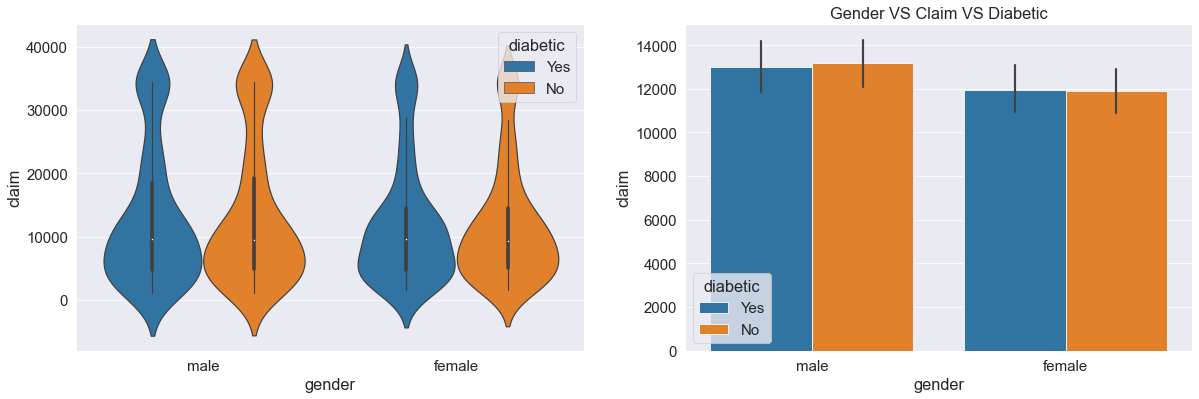

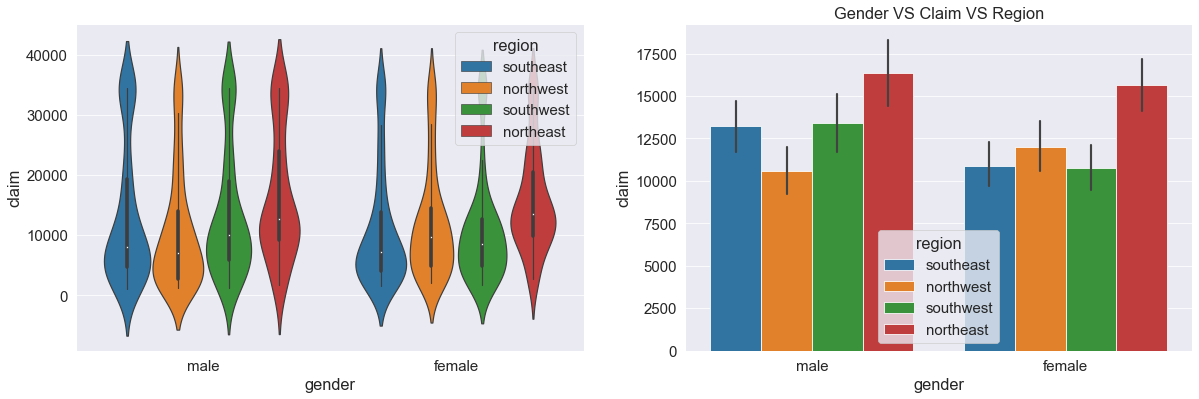

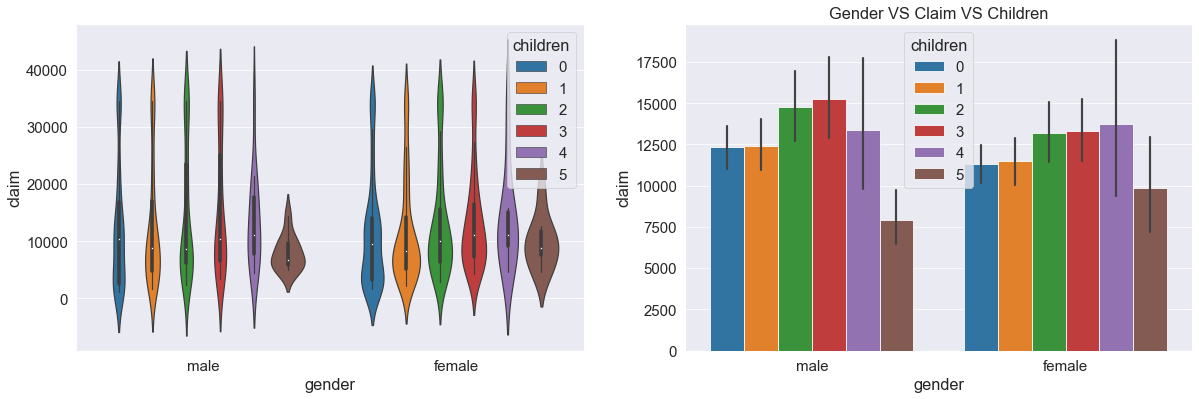

In [150]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS Claim VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS Claim VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Gender VS Claim VS Region')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['children'],ax=ax2)
plt.title('Gender VS Claim VS Children')

Text(0.5, 1.0, 'Gender VS BMI VS Smoker')

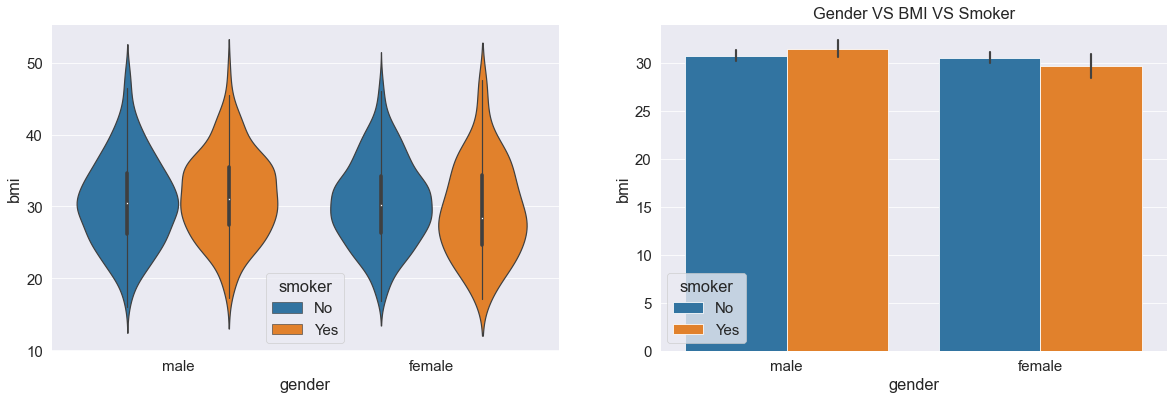

In [151]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS BMI VS Smoker')

Text(0.5, 1.0, 'Gender VS BMI VS Diabetic')

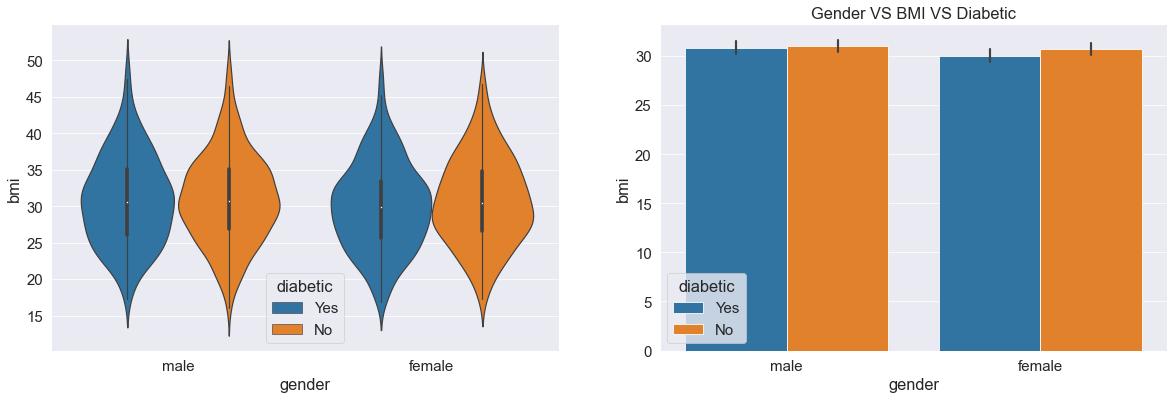

In [152]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS BMI VS Diabetic')

Text(0.5, 1.0, 'Gender VS BMI VS Region')

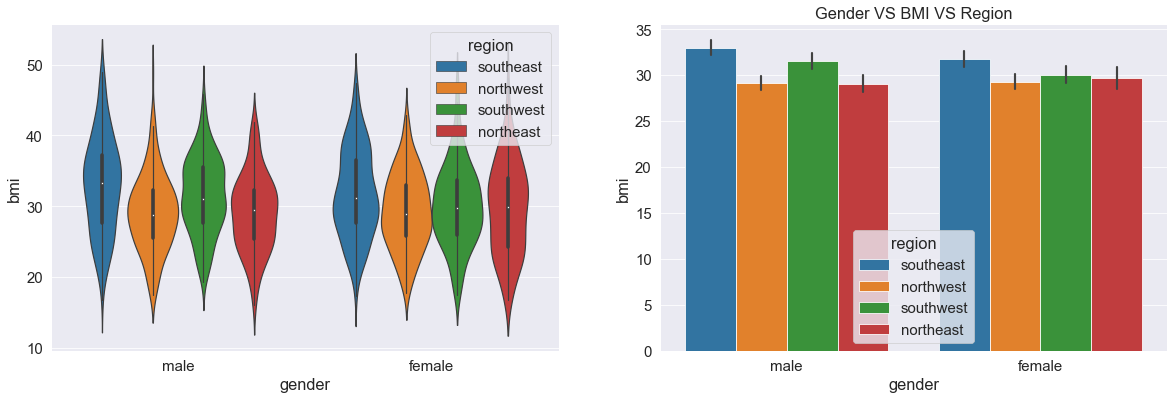

In [153]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax2)
plt.title('Gender VS BMI VS Region')

Text(0.5, 1.0, 'Gender VS Blood Pressure VS Smoker')

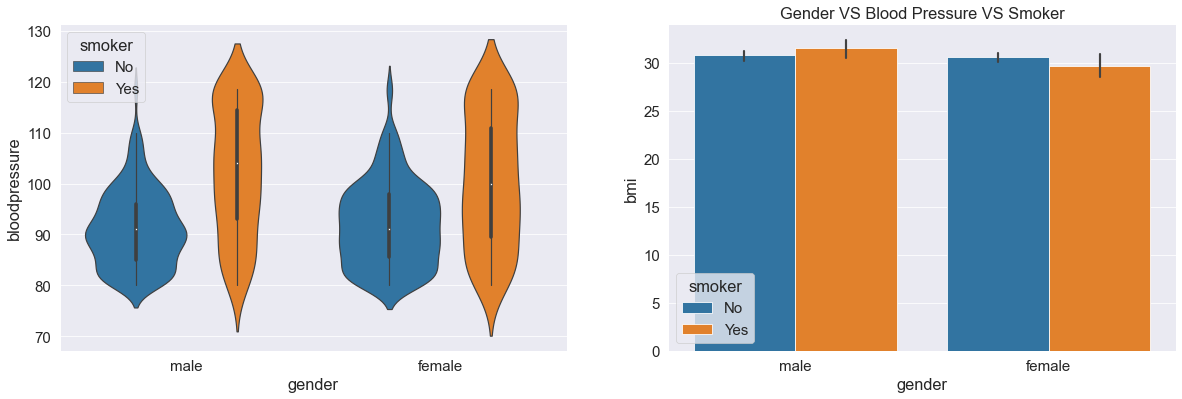

In [154]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS Blood Pressure VS Smoker')

Text(0.5, 1.0, 'Gender VS Blood Pressure VS Diabetic')

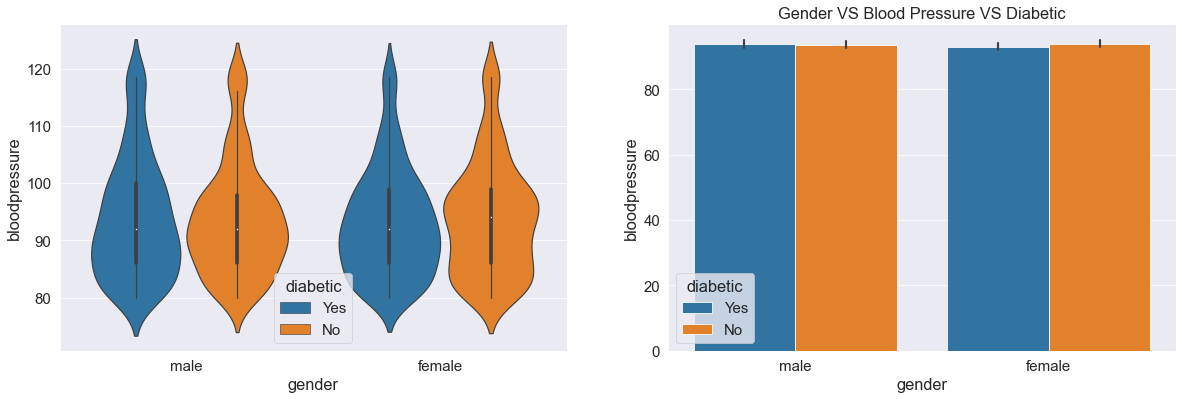

In [155]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS Blood Pressure VS Diabetic')

Text(0.5, 1.0, 'Gender VS BloodPressure VS Region')

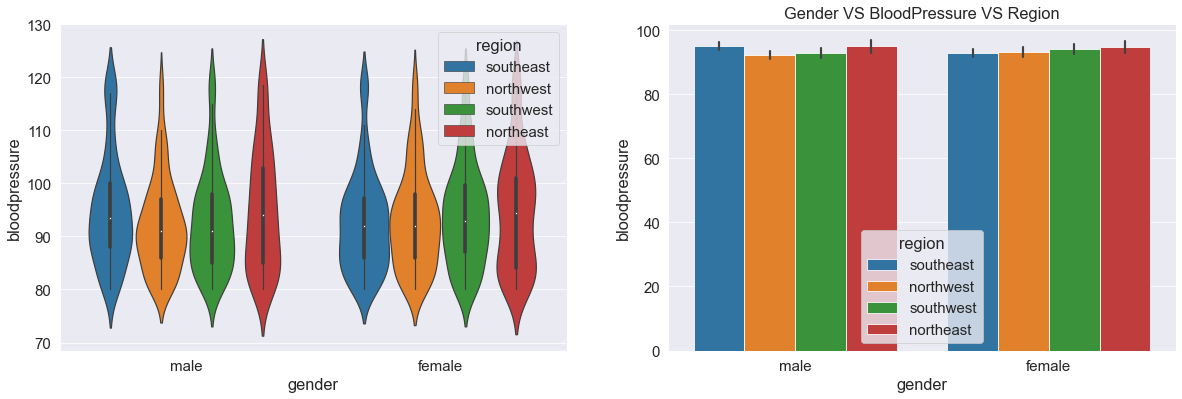

In [156]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax2)
plt.title('Gender VS BloodPressure VS Region')

Text(0.5, 1.0, 'Gender VS Claim VS Smoker')

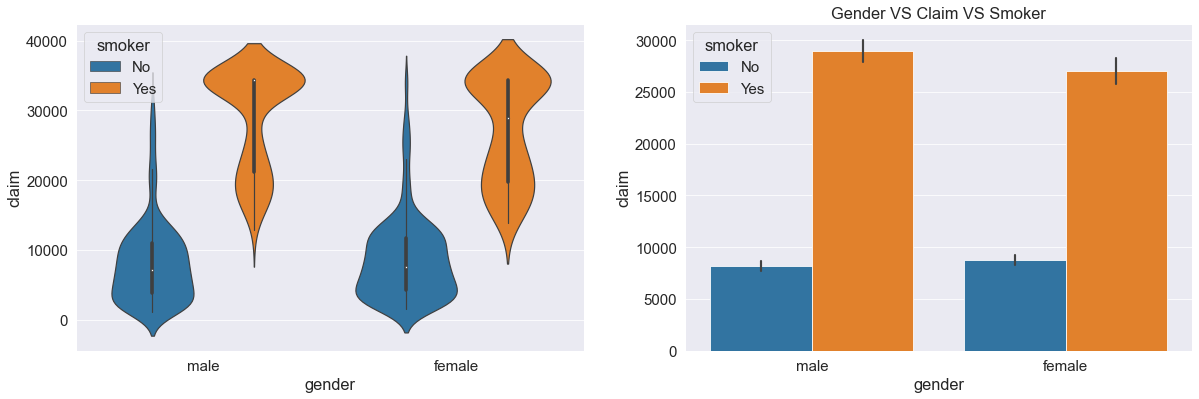

In [157]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax2)
plt.title('Gender VS Claim VS Smoker')

Text(0.5, 1.0, 'Gender VS Claim VS Diabetic')

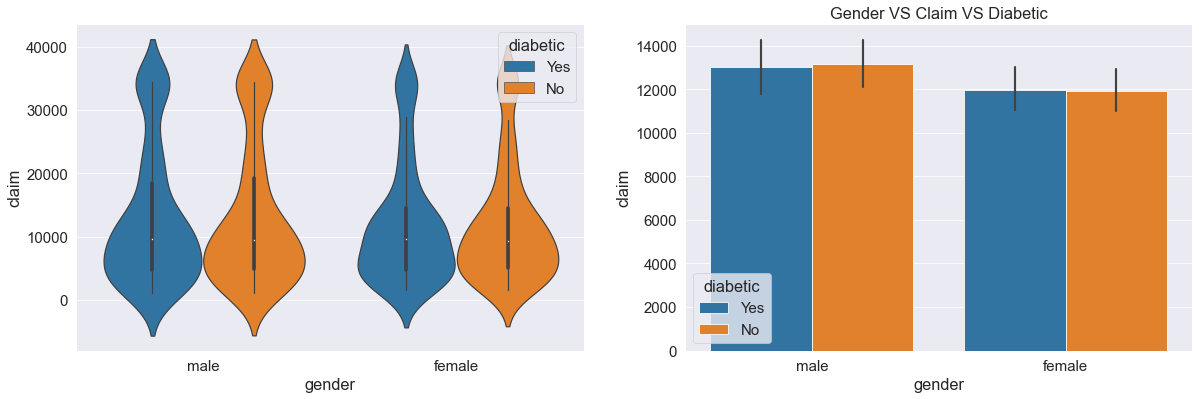

In [158]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax2)
plt.title('Gender VS Claim VS Diabetic')

Text(0.5, 1.0, 'Gender VS Claim VS Region')

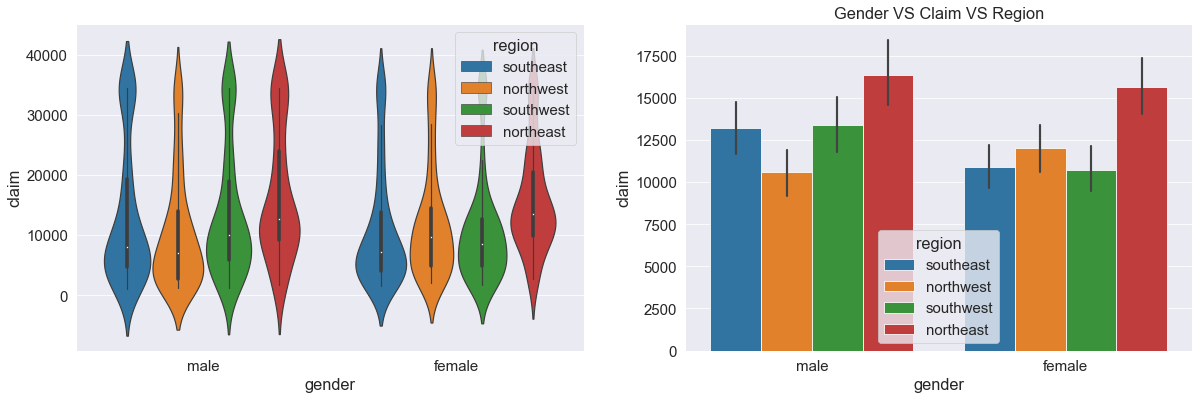

In [159]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Gender VS Claim VS Region')

Text(0.5, 1.0, 'Diabetic VS Bloodpressure VS Children')

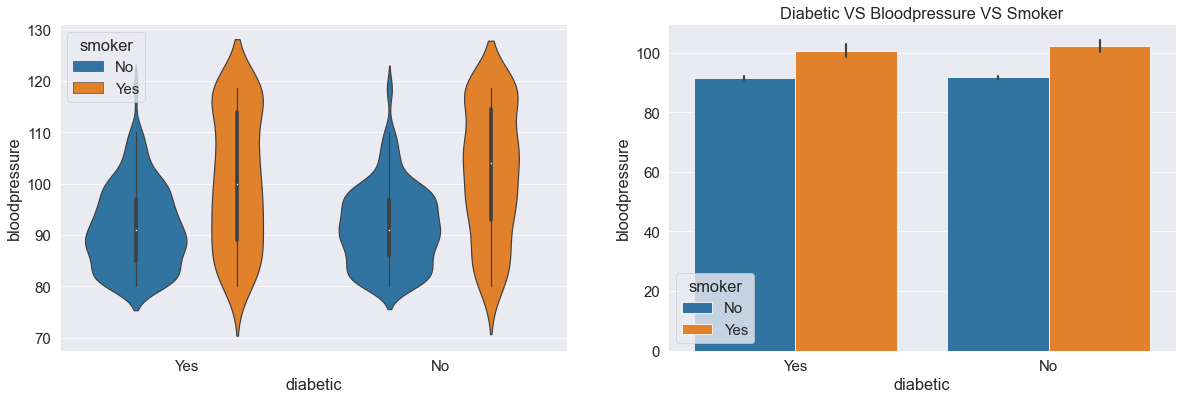

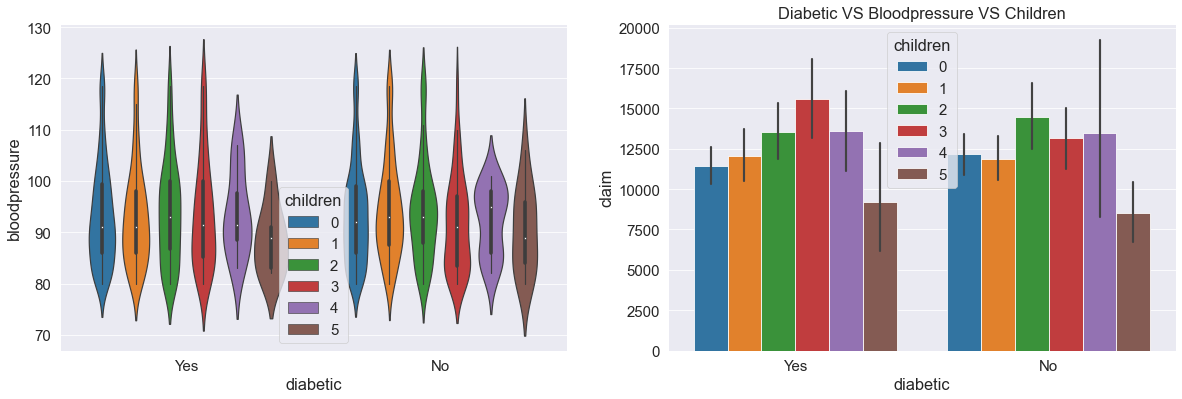

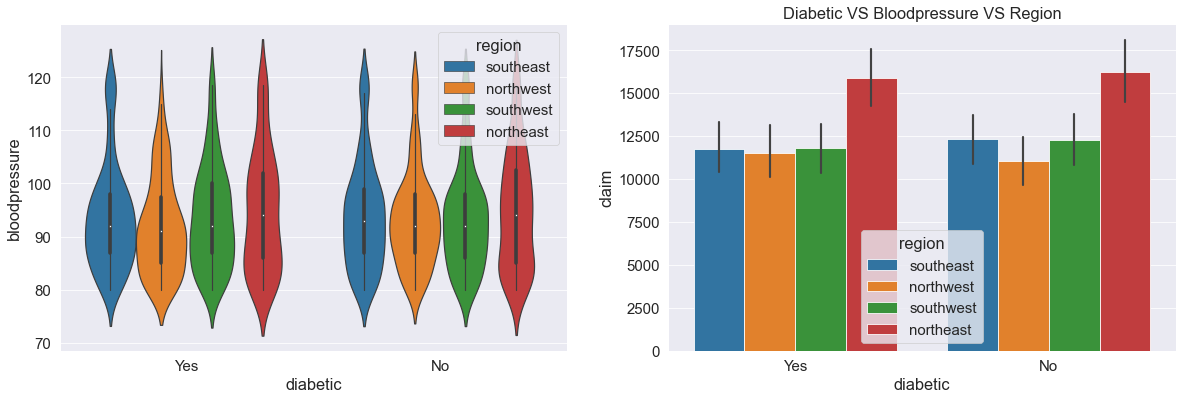

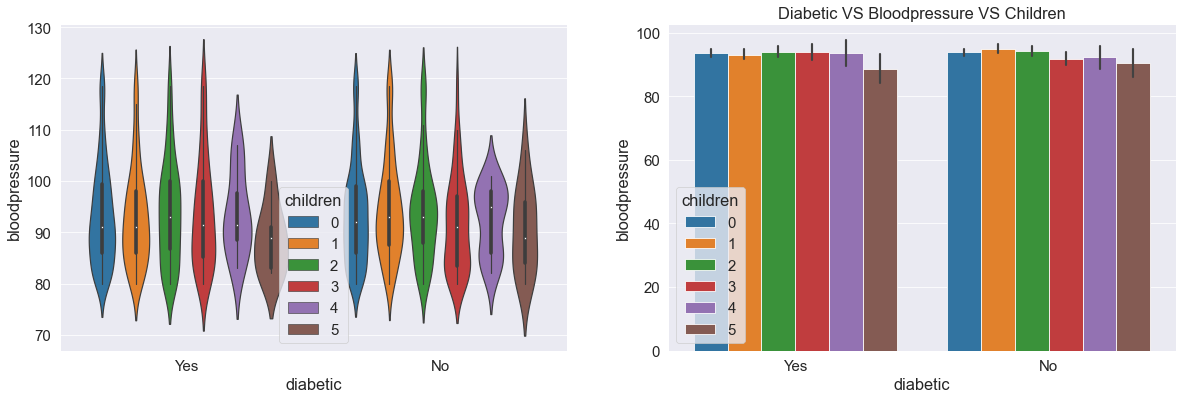

In [160]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['smoker'],ax=ax2)
plt.title('Diabetic VS Bloodpressure VS Smoker')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax2)
plt.title('Diabetic VS Bloodpressure VS Children')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Diabetic VS Bloodpressure VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax2)
plt.title('Diabetic VS Bloodpressure VS Children')

Text(0.5, 1.0, 'Diabetic VS Bmi VS Children')

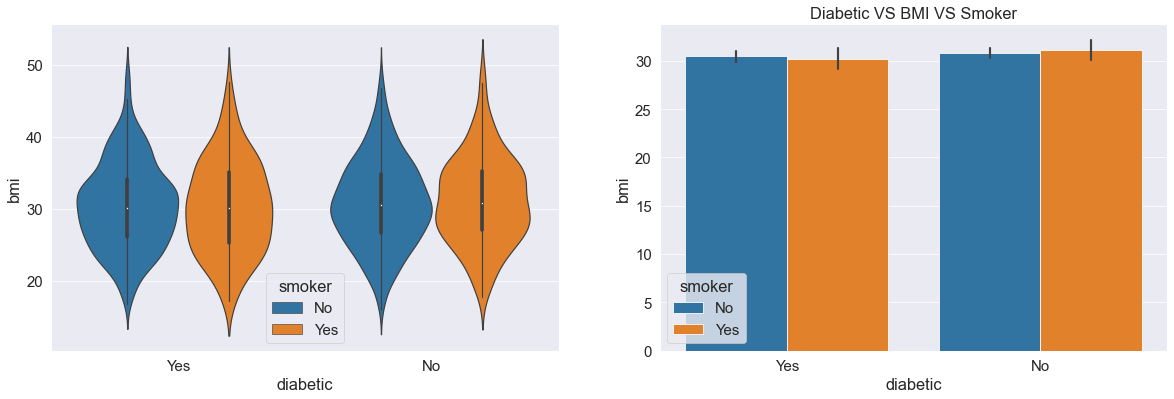

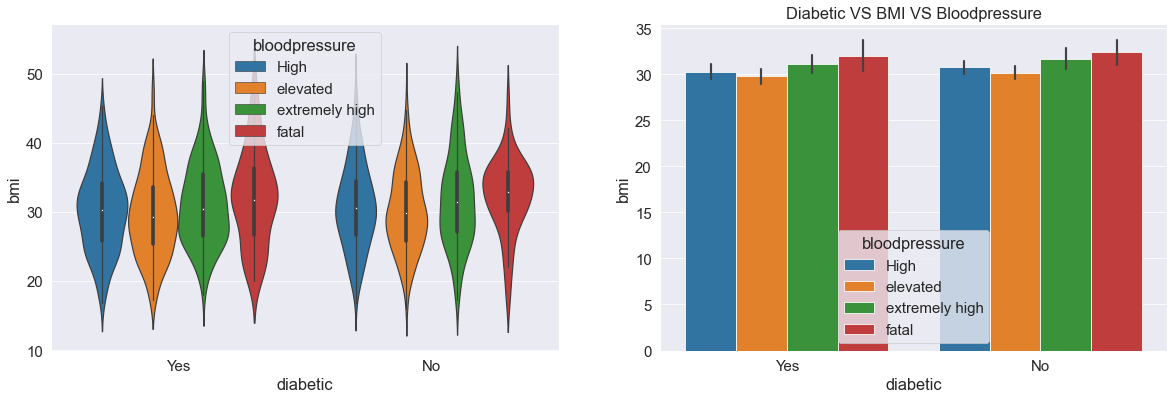

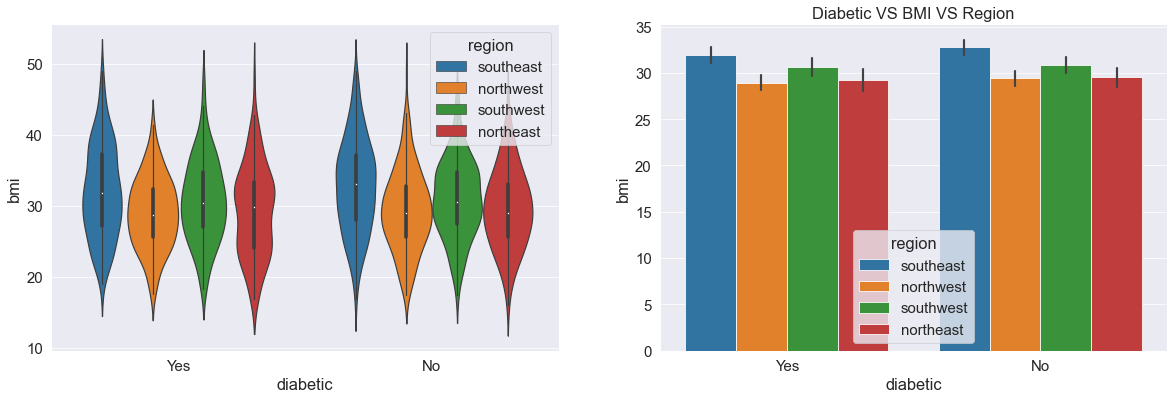

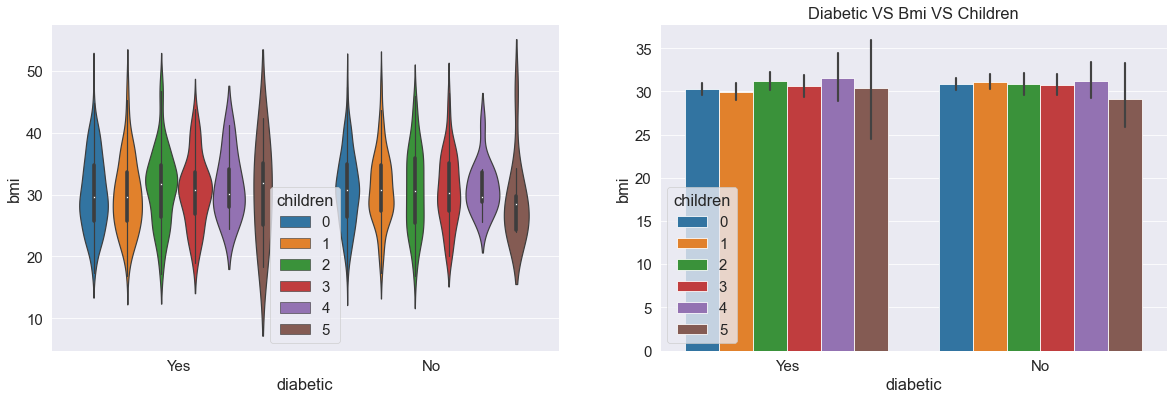

In [161]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Diabetic VS BMI VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=cat_df['bloodpressure'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=cat_df['bloodpressure'],ax=ax2)
plt.title('Diabetic VS BMI VS Bloodpressure')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['region'],ax=ax2)
plt.title('Diabetic VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['children'],ax=ax2)
plt.title('Diabetic VS Bmi VS Children')

Text(0.5, 1.0, 'Diabetic VS Claim VS Region')

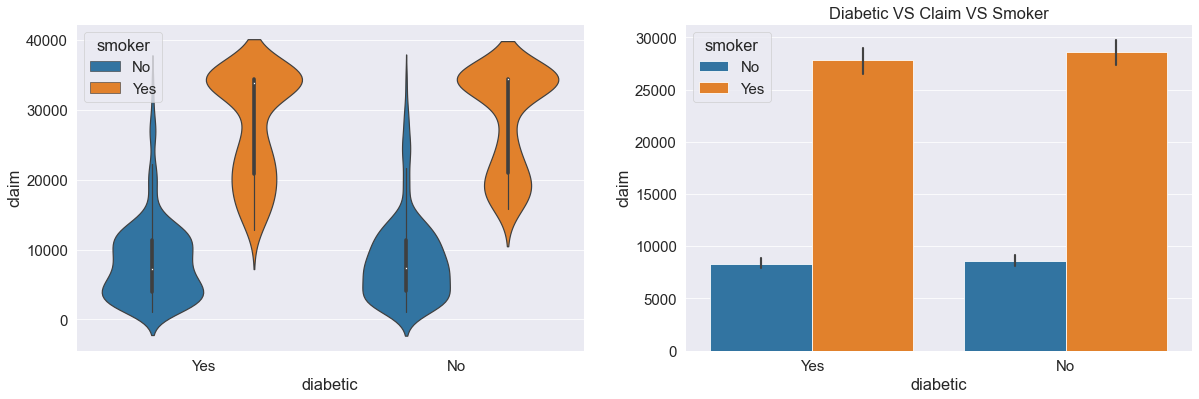

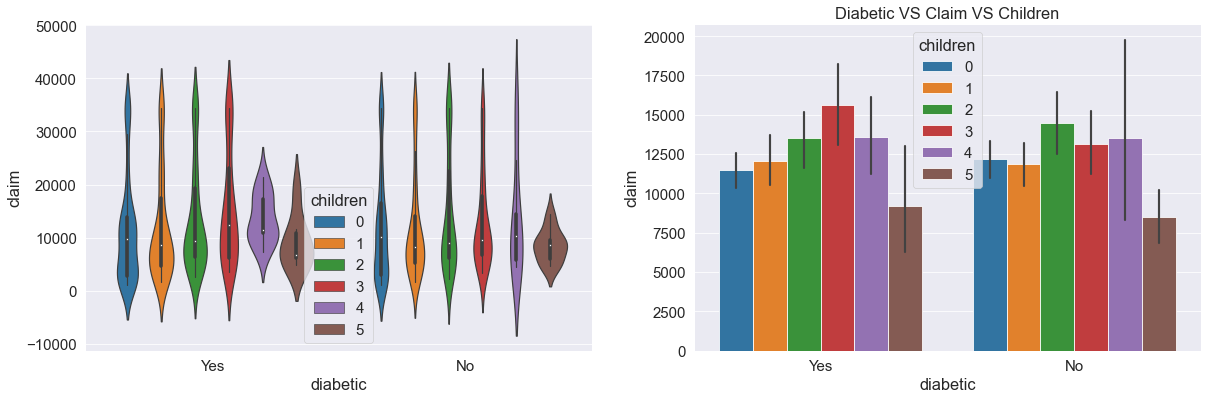

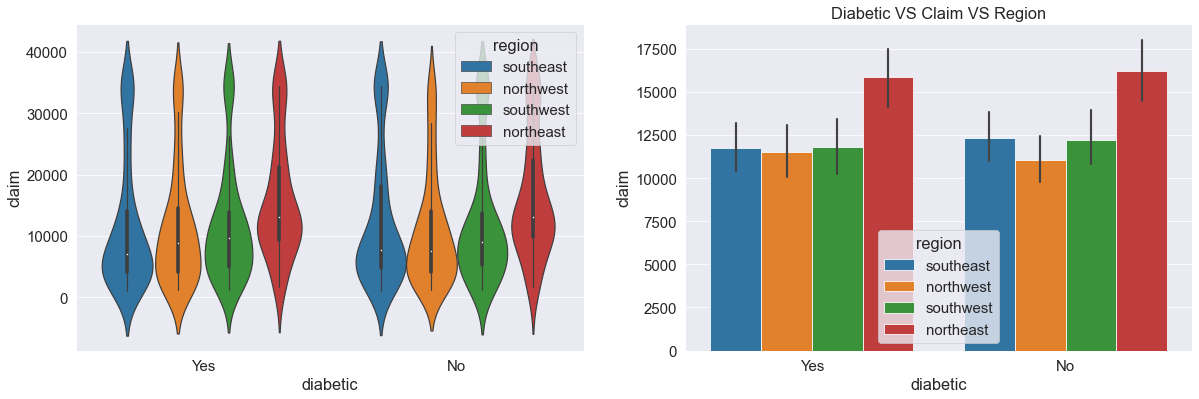

In [162]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['smoker'],ax=ax2)
plt.title('Diabetic VS Claim VS Smoker')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax2)
plt.title('Diabetic VS Claim VS Children')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Diabetic VS Claim VS Region')

Text(0.5, 1.0, 'Catagorical BloodPressure VS BMI VS Children')

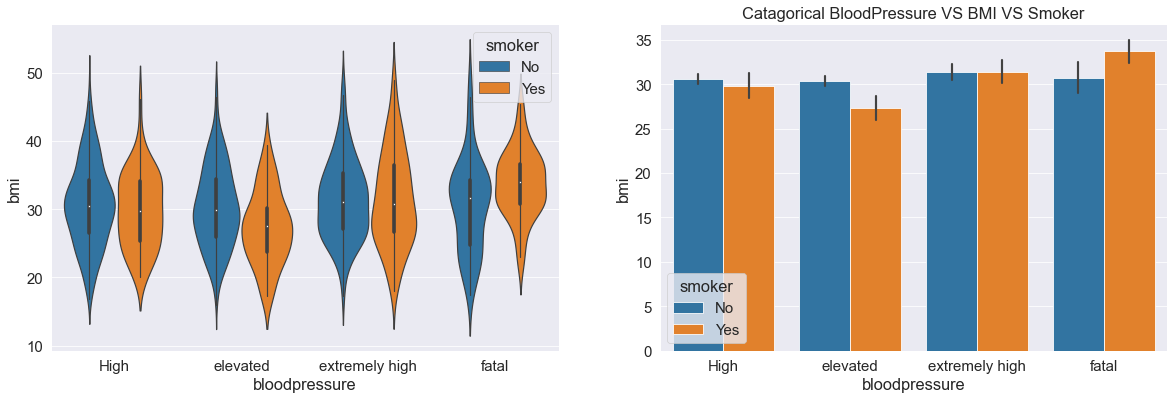

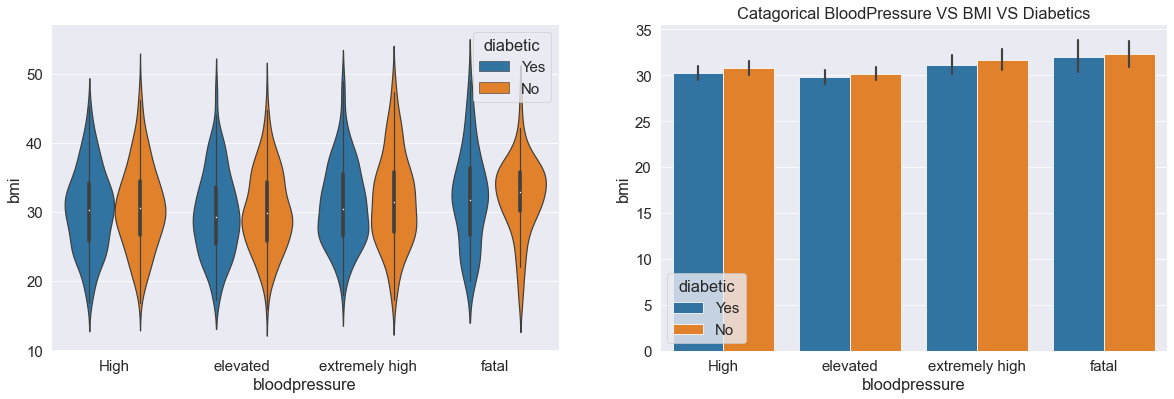

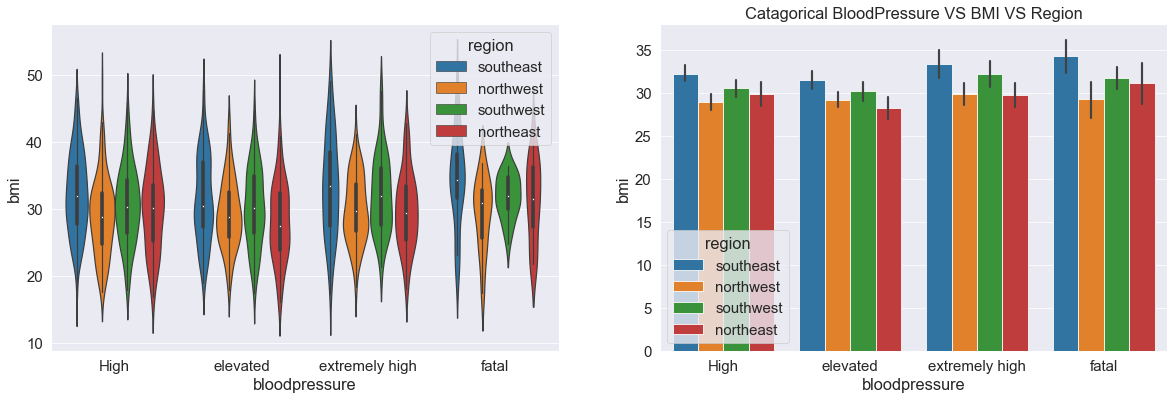

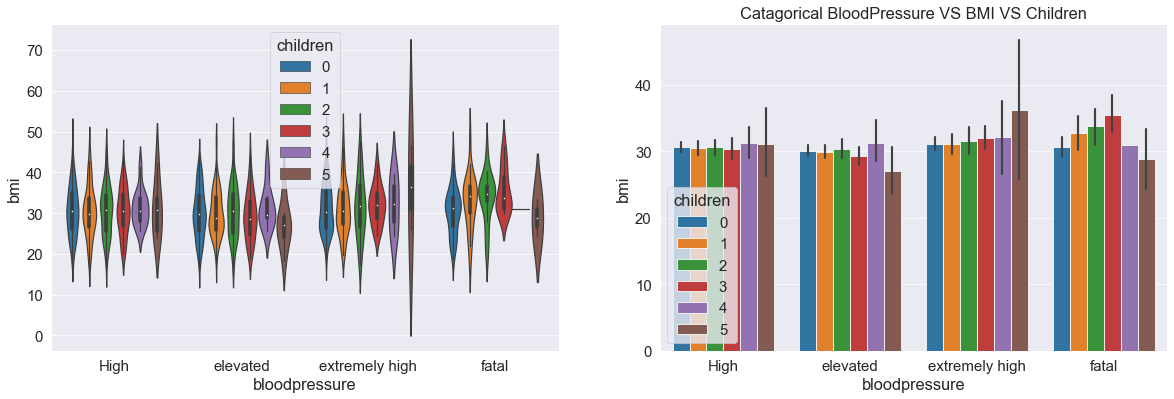

In [163]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['smoker'],ax=ax2)
plt.title('Catagorical BloodPressure VS BMI VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
plt.title('Catagorical BloodPressure VS BMI VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['region'],ax=ax2)
plt.title('Diabetic VS BMI VS Region')
plt.title('Catagorical BloodPressure VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['children'],ax=ax2)
plt.title('Catagorical BloodPressure VS BMI VS Children')


Text(0.5, 1.0, 'Catagorical BloodPressure VS Claim VS Children')

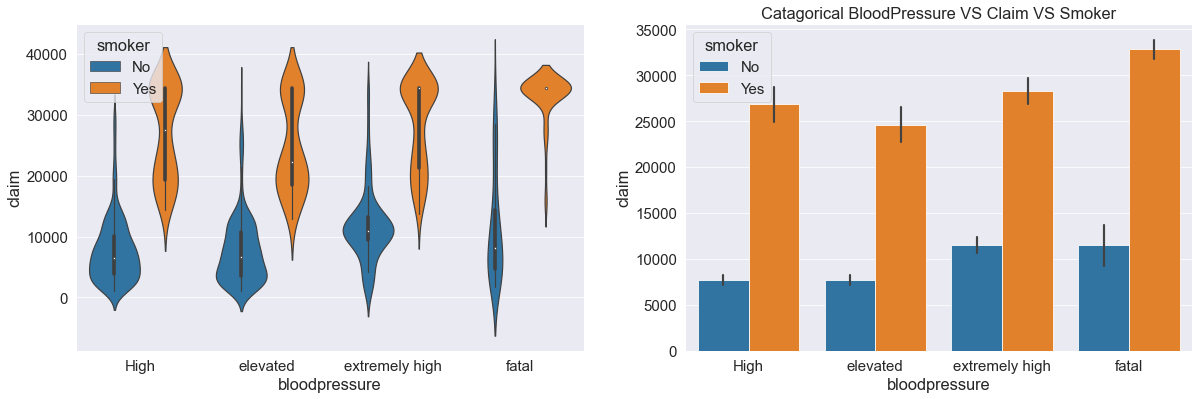

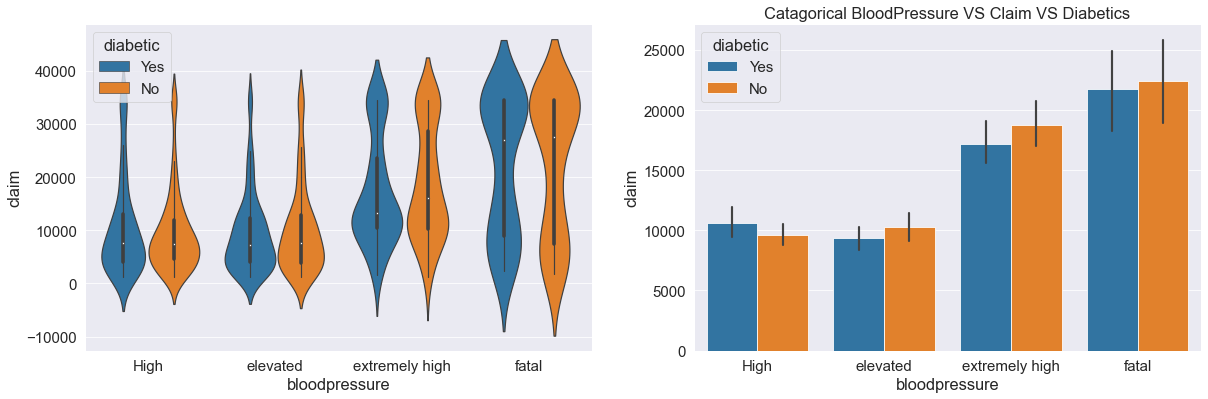

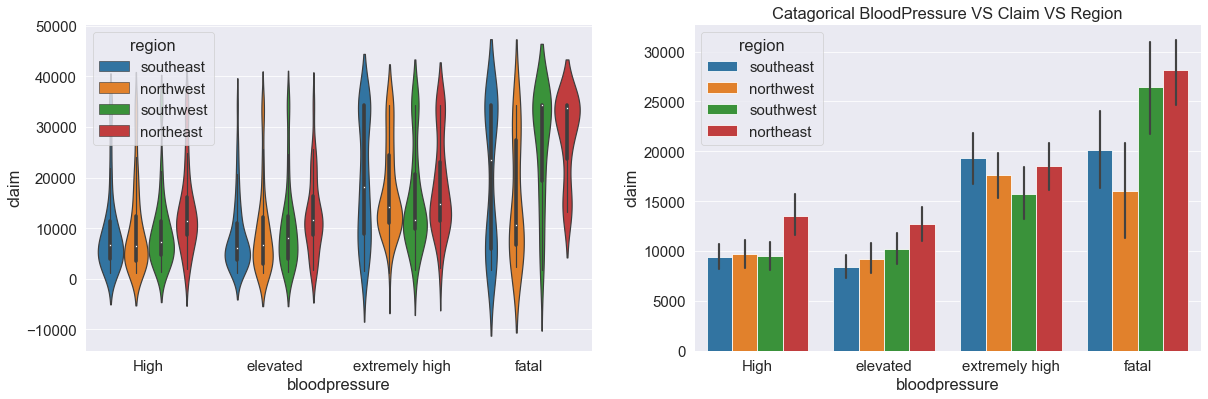

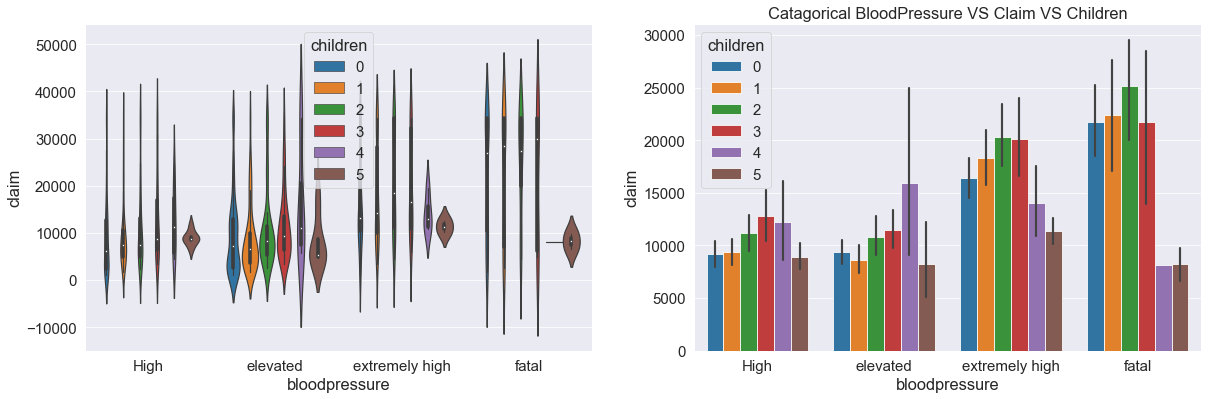

In [164]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax2)
plt.title('Catagorical BloodPressure VS Claim VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax2)
plt.title('Catagorical BloodPressure VS Claim VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Catagorical BloodPressure VS Claim VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['children'],ax=ax2)
plt.title('Catagorical BloodPressure VS Claim VS Children')


Text(0.5, 1.0, 'Catagorical BMI VS Claim VS Children')

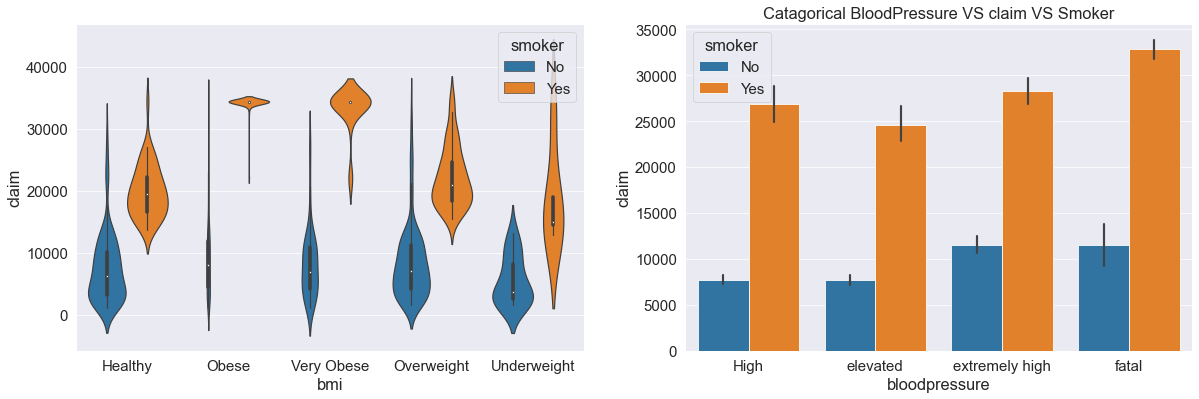

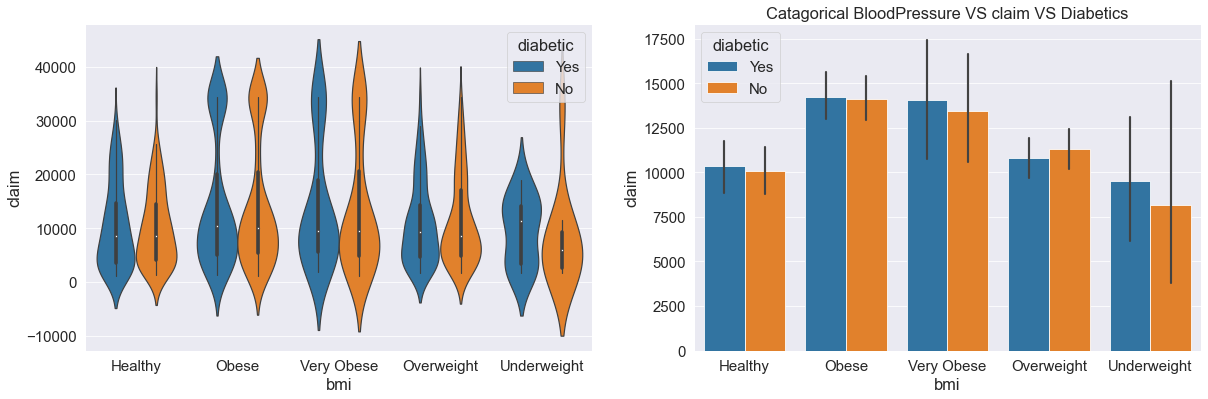

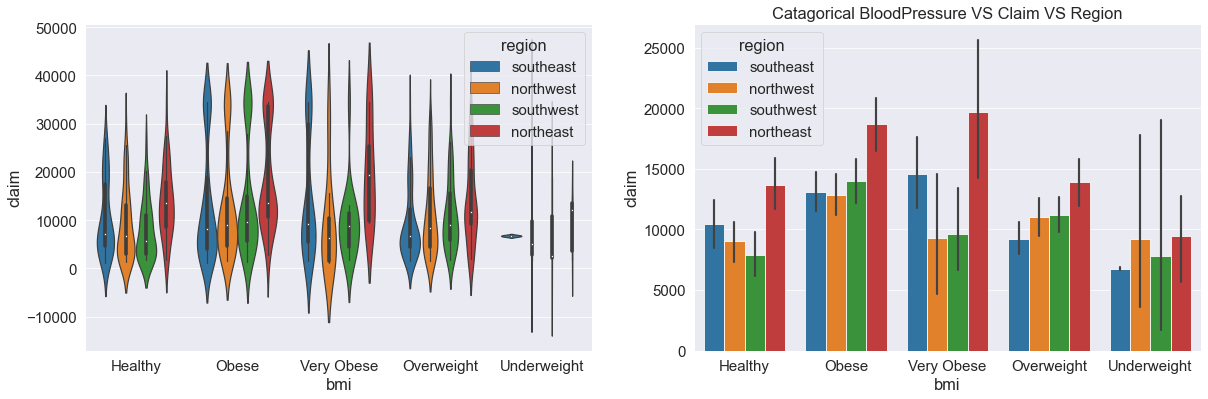

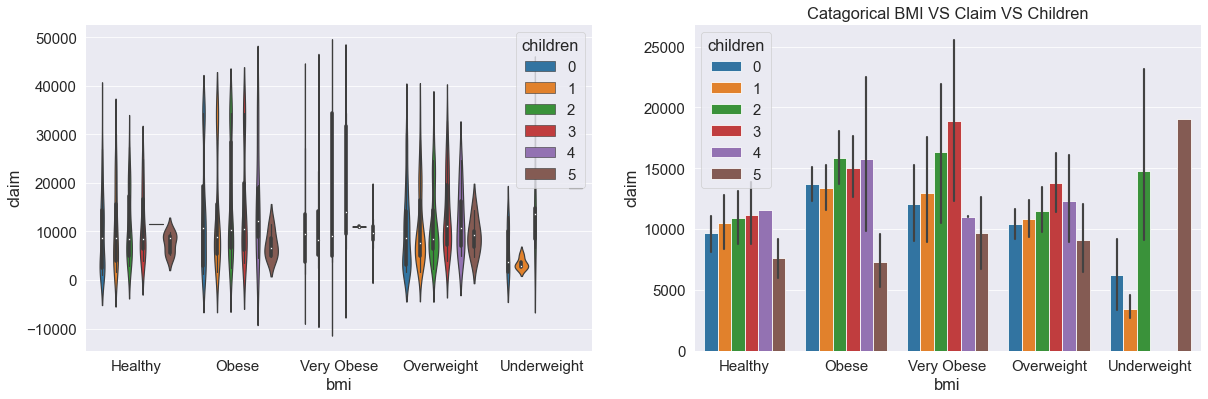

In [165]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax2)
plt.title('Catagorical BloodPressure VS claim VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax2)
plt.title('Catagorical BloodPressure VS claim VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['region'],ax=ax2)
plt.title('Catagorical BloodPressure VS Claim VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['children'],ax=ax2)
plt.title('Catagorical BMI VS Claim VS Children')


# Num to Num Features

<AxesSubplot: xlabel='bmi', ylabel='claim'>

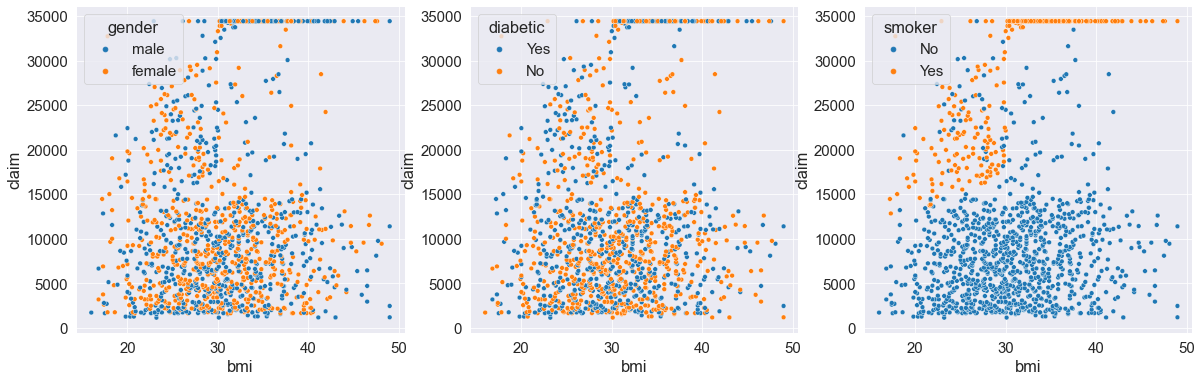

In [174]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['gender'],ax=ax1)
sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax2)
sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['smoker'],ax=ax3)


<AxesSubplot: xlabel='bloodpressure', ylabel='claim'>

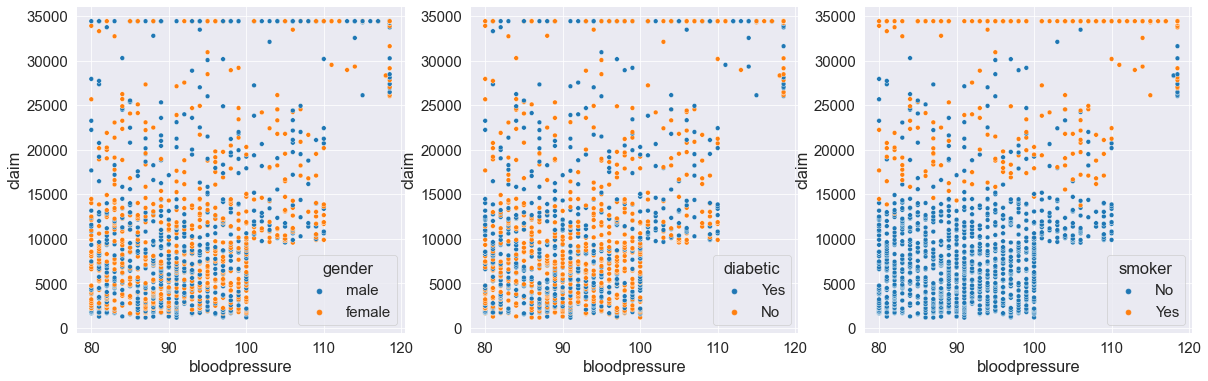

In [175]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['gender'],ax=ax1)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax2)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax3)

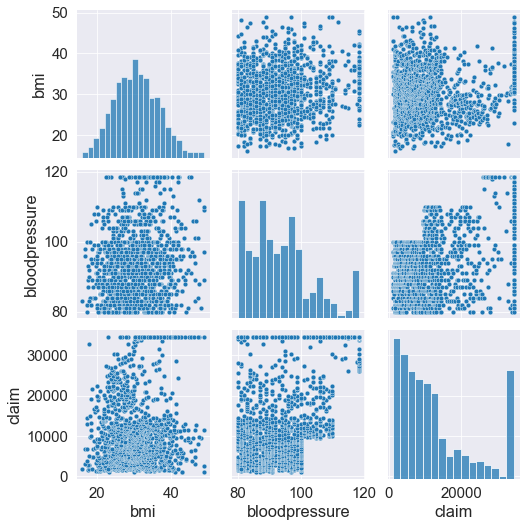

In [169]:
 sns.pairplot(df[['bmi','bloodpressure','claim']])

In [170]:
df[['bmi','bloodpressure','claim']].corr()

bmi  bloodpressure     claim
bmi            1.000000       0.142602  0.162010
bloodpressure  0.142602       1.000000  0.507589
claim          0.162010       0.507589  1.000000

<AxesSubplot: >

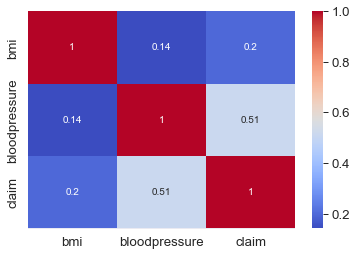

In [44]:
sns.heatmap(df[['bmi','bloodpressure','claim']].corr(),annot=True,cmap='coolwarm')

In [314]:
df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

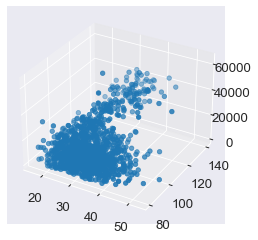

In [315]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['bmi'],df['bloodpressure'],df['claim'])

In [316]:
'''fig = plt.figure(figsize=(50,35))
ax1=plt.subplot(3,2,1)
ax2=plt.subplot(3,2,2)
ax3=plt.subplot(3,2,3)
ax4=plt.subplot(3,2,4)
ax5=plt.subplot(3,2,5)
ax6=plt.subplot(3,2,6)

sns.scatterplot(x=df['age'],y=df['bmi'],ax=ax1)
sns.scatterplot(x=df['age'],y=df['bloodpressure'],ax=ax2)
sns.scatterplot(x=df['age'],y=df['claim'],ax=ax3)
sns.scatterplot(x=df['bmi'],y=df['bloodpressure'],ax=ax4)
sns.scatterplot(x=df['bmi'],y=df['claim'],ax=ax5)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],ax=ax6)
'''

"fig = plt.figure(figsize=(50,35))\nax1=plt.subplot(3,2,1)\nax2=plt.subplot(3,2,2)\nax3=plt.subplot(3,2,3)\nax4=plt.subplot(3,2,4)\nax5=plt.subplot(3,2,5)\nax6=plt.subplot(3,2,6)\n\nsns.scatterplot(x=df['age'],y=df['bmi'],ax=ax1)\nsns.scatterplot(x=df['age'],y=df['bloodpressure'],ax=ax2)\nsns.scatterplot(x=df['age'],y=df['claim'],ax=ax3)\nsns.scatterplot(x=df['bmi'],y=df['bloodpressure'],ax=ax4)\nsns.scatterplot(x=df['bmi'],y=df['claim'],ax=ax5)\nsns.scatterplot(x=df['bloodpressure'],y=df['claim'],ax=ax6)\n"

# Feature Engineering

In [317]:
from sklearn.preprocessing import FunctionTransformer

<h1 align='center'> Log Transformation</h1>

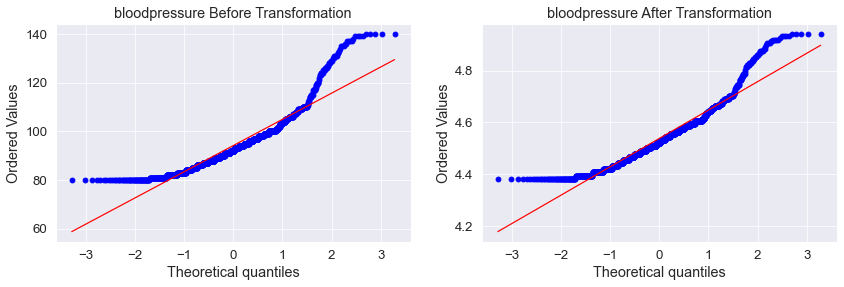

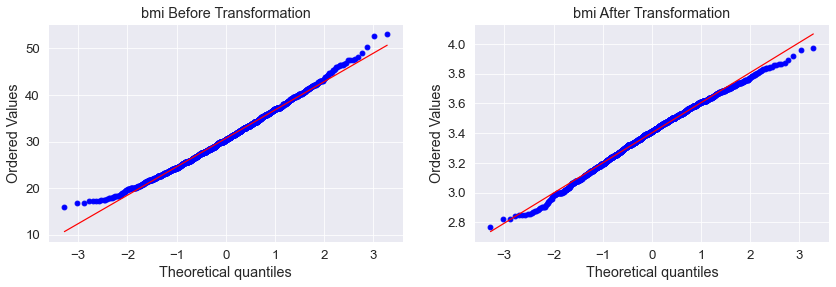

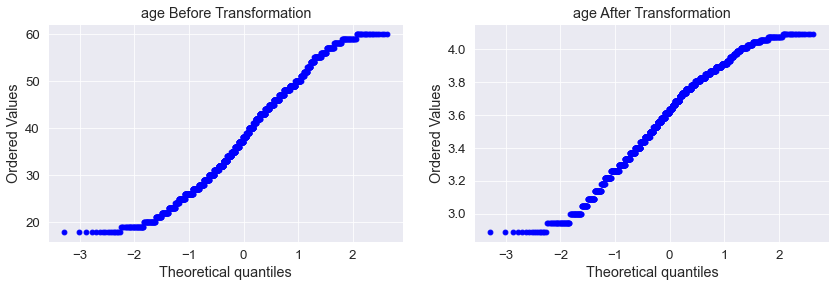

In [318]:
def log_transformation(val):
    return np.log(val)
import scipy.stats as stats
num_cols = ['bloodpressure','bmi','age']
num_df = pd.DataFrame(columns=num_cols)
for col in num_cols:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'{col} Before Transformation')    
    
    num_df[col] = df[col].apply(log_transformation)
    
    plt.subplot(122)
    stats.probplot(num_df[col], dist="norm", plot=plt)
    plt.title(f'{col} After Transformation')
    plt.show()    






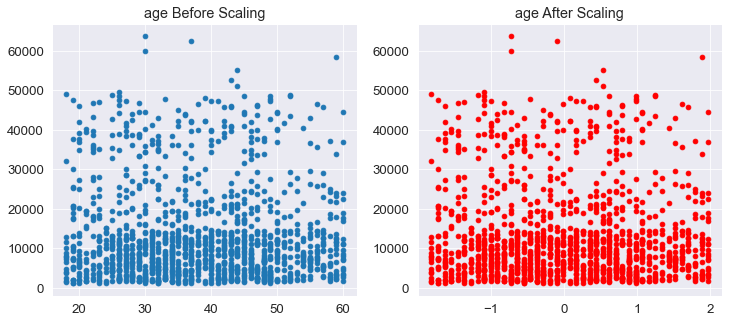

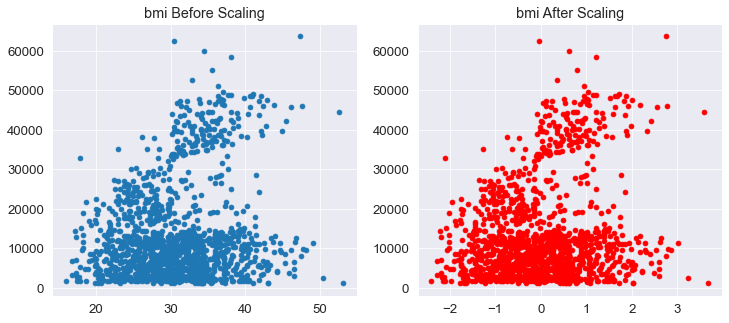

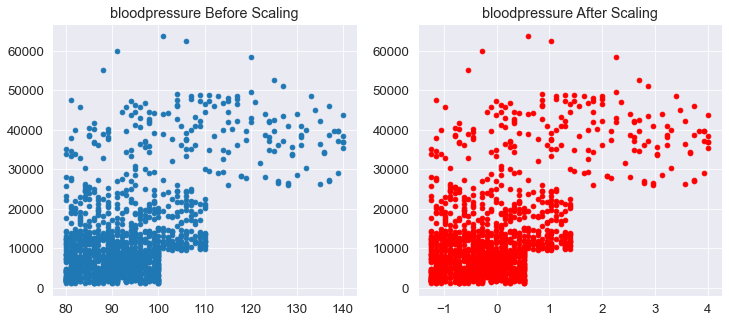

In [319]:

num_cols = ['age','bmi','bloodpressure']
for col in num_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.scatter(df[col], df['claim'])
    ax1.set_title(f"{col} Before Scaling") 
    scaler = StandardScaler()
    scaler.fit(df[[col]]) 
    df[col] = scaler.transform(df[[col]])
    ax2.scatter(df[col], df['claim'],color='red')
    ax2.set_title(f"{col} After Scaling")
    plt.show()


# Model Selection and Training

In [344]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [345]:
# Splitting the data
X = df.drop(columns=['claim'])
y = df[['claim']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering Complete Pipe Line

In [346]:
# Categorical columns and preprocessor
numeric_cols = [0, 2, 3]
categorical_cols = [1,4,6,7]
# Defining the pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transformer', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False, drop='first')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating the pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linearregression', LinearRegression())
])



In [355]:
# Fitting the pipeline to the training data
pipeline.fit(x_train, y_train)

# Making predictions
y_pred = pipeline.predict(x_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Model Evaluation

In [356]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [357]:
# Displaying the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4759.886175076926
Mean Squared Error: 40995932.093317844
Root Mean Squared Error: 6402.806579408583
R-squared: 0.7504769595395457


In [363]:
import pickle
pickle.dump(pipeline,open('insurance.pkl','wb'))

In [364]:
pipe = pickle.load(open('insurance.pkl','rb'))

In [368]:
# Assume user input
test_input2 = np.array([24, 'male',30.1, 87, 'Yes', 0, 'No','southeast'],dtype=object).reshape(1,8)

In [369]:
df.head(2)

age gender   bmi  bloodpressure diabetic  children smoker     region  \
0  39.0   male  23.2             91      Yes         0     No  southeast   
1  24.0   male  30.1             87       No         0     No  southeast   

     claim  
0  1121.87  
1  1131.51

In [370]:
pipe.predict(test_input2)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[6237.52668791]])